In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats



In [2]:
!wget https://raw.githubusercontent.com/ezzaddeentru/used-cars-selling-price-estimating---case-study/main/toyota.csv

--2024-08-08 23:54:44--  https://raw.githubusercontent.com/ezzaddeentru/used-cars-selling-price-estimating---case-study/main/toyota.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347863 (340K) [text/plain]
Saving to: ‘toyota.csv’

toyota.csv          100%[===================>] 339.71K  --.-KB/s    in 0.03s   

2024-08-08 23:54:44 (10.7 MB/s) - ‘toyota.csv’ saved [347863/347863]



In [24]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


# Sampling

In [ ]:
# let's consider this the population mean

# Compute the mean of the entire 'price' column
overall_mean = df['price'].mean()
overall_mean

12522.3910655981

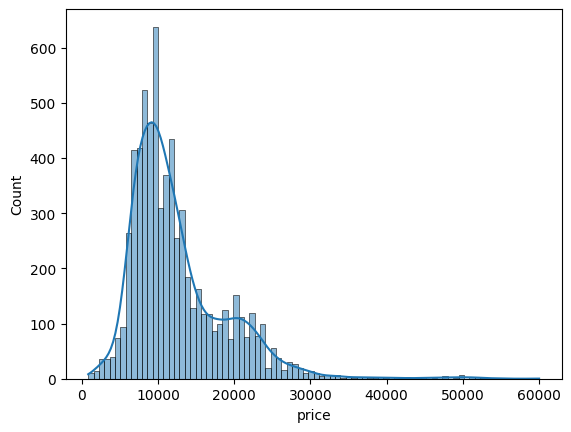

In [ ]:
sns.histplot(df['price'], kde=True)
plt.show()

In [ ]:
# Sample data for different sample sizes
price_sample_5 = df['price'].sample(5, random_state=42)
price_sample_20 = df['price'].sample(20, random_state=42)
price_sample_100 = df['price'].sample(100, random_state=42)
price_sample_1000 = df['price'].sample(1000, random_state=42)
price_sample_2000 = df['price'].sample(2000, random_state=42)

# Convert to Pandas Series
price_sample_5 = pd.Series(price_sample_5)
price_sample_20 = pd.Series(price_sample_20)
price_sample_100 = pd.Series(price_sample_100)
price_sample_1000 = pd.Series(price_sample_1000)
price_sample_2000 = pd.Series(price_sample_2000)

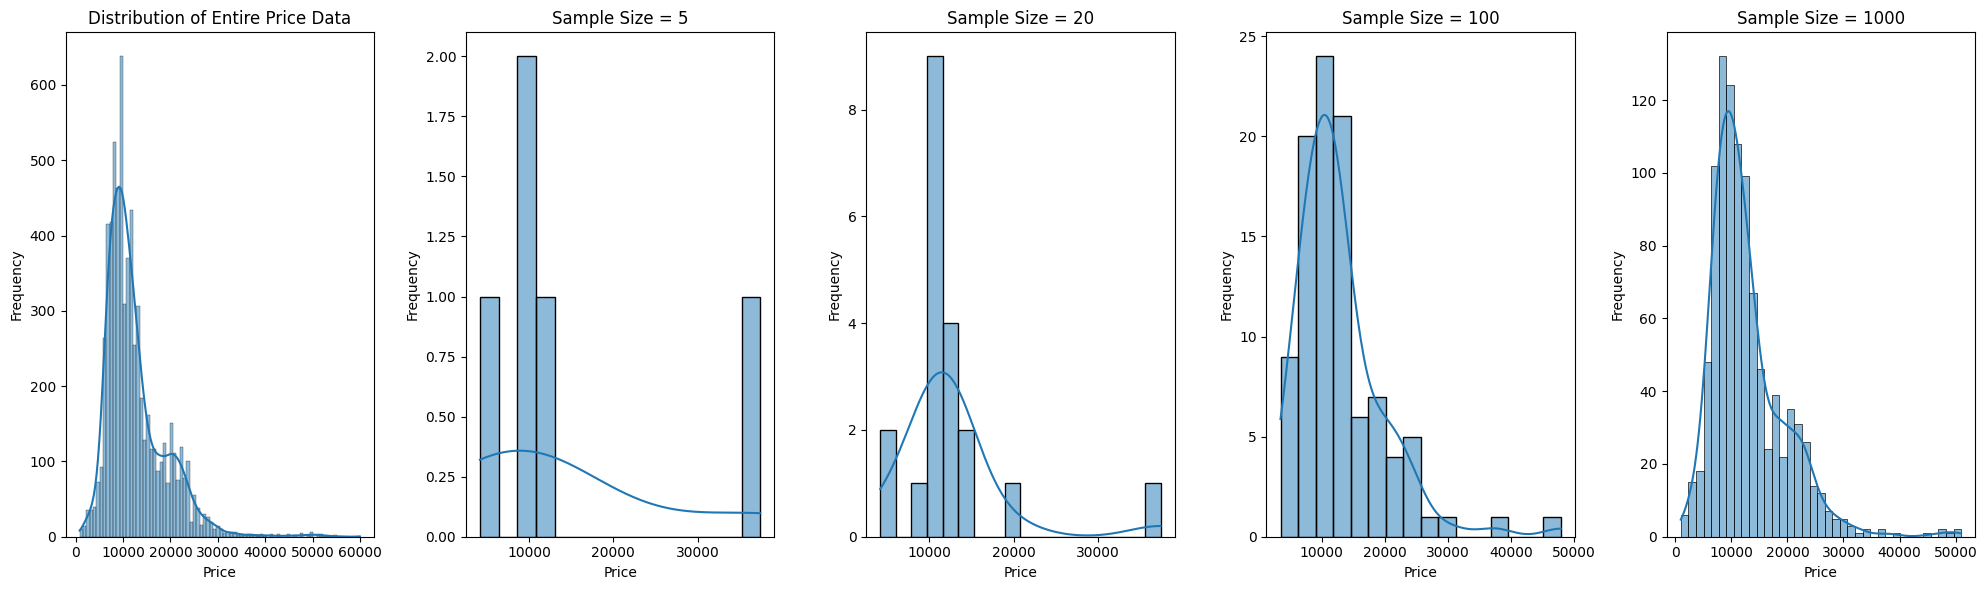

In [ ]:
# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

# Plot distribution of the entire 'price' column
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Entire Price Data')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot distribution of sample of 5 prices
sns.histplot(price_sample_5, kde=True, ax=axes[1])
axes[1].set_title('Sample Size = 5')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

# Plot distribution of sample of 20 prices
sns.histplot(price_sample_20, kde=True, ax=axes[2])
axes[2].set_title('Sample Size = 20')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

# Plot distribution of sample of 100 prices
sns.histplot(price_sample_100, kde=True, ax=axes[3])
axes[3].set_title('Sample Size = 100')
axes[3].set_xlabel('Price')
axes[3].set_ylabel('Frequency')

# Plot distribution of sample of 1000 prices
sns.histplot(price_sample_1000, kde=True, ax=axes[4])
axes[4].set_title('Sample Size = 1000')
axes[4].set_xlabel('Price')
axes[4].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df['price'].describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

In [ ]:
price_sample_1000.describe(), price_sample_2000.describe()

(count     1000.000000
 mean     12765.651000
 std       6571.569819
 min        950.000000
 25%       8390.750000
 50%      11000.000000
 75%      15333.750000
 max      50995.000000
 Name: price, dtype: float64,
 count     2000.000000
 mean     12660.475000
 std       6337.307181
 min        950.000000
 25%       8295.000000
 50%      10998.000000
 75%      15456.250000
 max      50995.000000
 Name: price, dtype: float64)

Why Sample Size of 1000 is Often Representative:
- Law of Large Numbers: As the sample size increases, the sample mean tends to get closer to the population mean. A sample size of 1000 is generally large enough for the sample mean to approximate the population mean with reasonable accuracy.

- Central Limit Theorem (CLT): The CLT states that the distribution of the sample mean will approach a normal distribution as the sample size increases, regardless of the population distribution. With a sample size of 1000, the sample mean should be approximately normally distributed, making it a good estimator of the population mean.

- Sampling Variability: Larger sample sizes reduce the variability of the sample estimates. A sample size of 1000 is often sufficient to capture the main characteristics of the distribution without too much variability.

- Visual Comparison: As seen in your plots, the distribution of means from samples of size 1000 is likely to be very similar to the distribution of the entire dataset. This visual confirmation can be reassuring.

**Considerations for Modeling**

While a sample size of 1000 can be representative, keep the following in mind when using it for modeling:

- Check for Bias: Ensure that the sample is random and representative of the population. If there are biases in how the sample is drawn, it could affect the model.

- Compare with Larger Samples: If you have the capability, compare the results from a sample size of 1000 with even larger samples or the full dataset to ensure robustness.

- Model Validation: Even with a representative sample, always validate your model with additional data (e.g., using cross-validation techniques) to assess its performance and generalizability.

- Understand Variability: Be aware that while a sample size of 1000 is often sufficient, variability in the data means that results could still differ slightly from the population. Consider this when making inferences or decisions based on the model.

In [ ]:
# Prepare data for each sample size
price_sample_5_means = [df['price'].sample(5, random_state=i).mean() for i in range(1000)]
price_sample_20_means = [df['price'].sample(20, random_state=i).mean() for i in range(1000)]
price_sample_100_means = [df['price'].sample(100, random_state=i).mean() for i in range(1000)]
price_sample_1000_means = [df['price'].sample(1000, random_state=i).mean() for i in range(1000)]
price_sample_2000_means = [df['price'].sample(2000, random_state=i).mean() for i in range(1000)]
price_sample_all_means = [df['price'].sample(len(df), random_state=i).mean() for i in range(1000)]

# Convert lists to Pandas Series
price_sample_5_means = pd.Series(price_sample_5_means)
price_sample_20_means = pd.Series(price_sample_20_means)
price_sample_100_means = pd.Series(price_sample_100_means)
price_sample_1000_means = pd.Series(price_sample_1000_means)
price_sample_2000_means = pd.Series(price_sample_2000_means)
price_sample_all_means = pd.Series(price_sample_all_means)

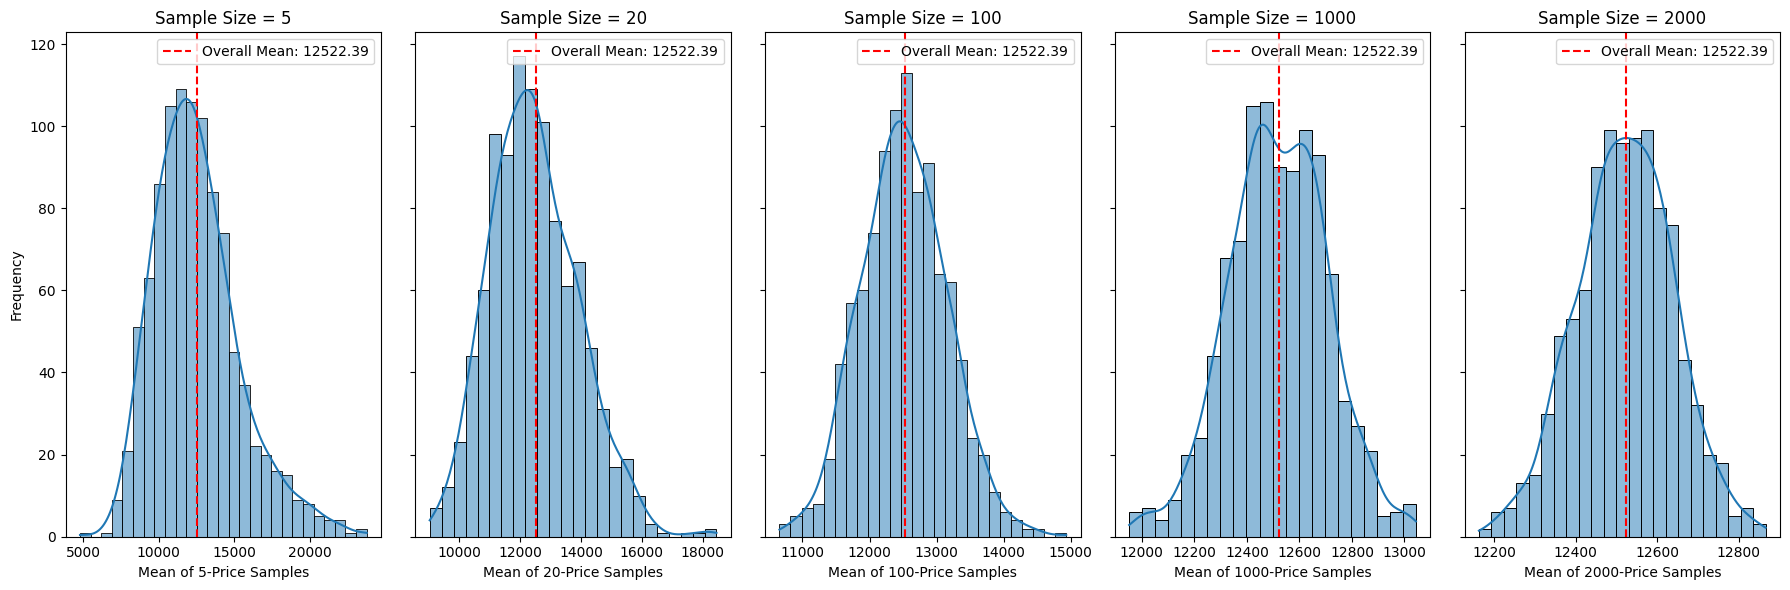

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharey=True)

# Plot for sample size 5
sns.histplot(price_sample_5_means, kde=True, ax=axes[0])
axes[0].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[0].set_xlabel('Mean of 5-Price Samples')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sample Size = 5')
axes[0].legend()

# Plot for sample size 20
sns.histplot(price_sample_20_means, kde=True, ax=axes[1])
axes[1].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[1].set_xlabel('Mean of 20-Price Samples')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Sample Size = 20')
axes[1].legend()

# Plot for sample size 100
sns.histplot(price_sample_100_means, kde=True, ax=axes[2])
axes[2].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[2].set_xlabel('Mean of 100-Price Samples')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Sample Size = 100')
axes[2].legend()

# Plot for sample size 1000
sns.histplot(price_sample_1000_means, kde=True, ax=axes[3])
axes[3].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[3].set_xlabel('Mean of 1000-Price Samples')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Sample Size = 1000')
axes[3].legend()

# Plot for sample size 2000
sns.histplot(price_sample_2000_means, kde=True, ax=axes[4])
axes[4].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[4].set_xlabel('Mean of 2000-Price Samples')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Sample Size = 2000')
axes[4].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**the sample size of 1000 is giving us a very good results of the overall mean.**

We can observe an important statistical principle: as the sample size increases, the sample means tend to cluster more closely around the population mean. This phenomenon can be explained by **the Central Limit Theorem (CLT)**, which states that as the sample size increases, the distribution of the sample mean will approach a normal distribution, centered around the population mean.

<br>
Central Limit Theorem (CLT):

- CLT: This theorem asserts that, regardless of the original distribution of the data, the distribution of the sample mean will tend to be normally distributed as the sample size becomes sufficiently large.
- Narrower Distribution: Larger sample sizes **reduce the standard error** of the mean, which leads to a narrower distribution of sample means around the population mean.

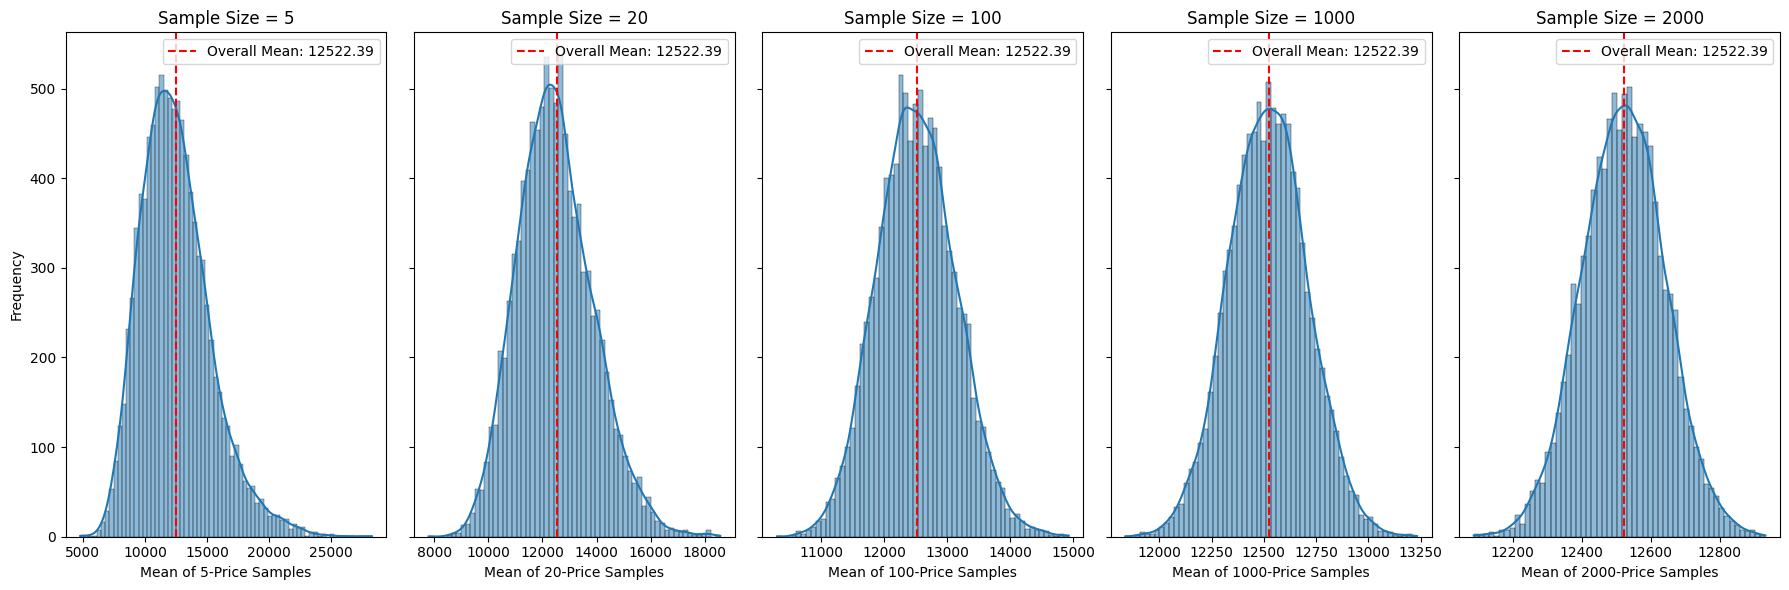

In [ ]:
# Prepare data for each sample size
price_sample_5_means = [df['price'].sample(5, random_state=i).mean() for i in range(10000)]
price_sample_20_means = [df['price'].sample(20, random_state=i).mean() for i in range(10000)]
price_sample_100_means = [df['price'].sample(100, random_state=i).mean() for i in range(10000)]
price_sample_1000_means = [df['price'].sample(1000, random_state=i).mean() for i in range(10000)]
price_sample_2000_means = [df['price'].sample(2000, random_state=i).mean() for i in range(10000)]

# Convert lists to Pandas Series
price_sample_5_means = pd.Series(price_sample_5_means)
price_sample_20_means = pd.Series(price_sample_20_means)
price_sample_100_means = pd.Series(price_sample_100_means)
price_sample_1000_means = pd.Series(price_sample_1000_means)
price_sample_2000_means = pd.Series(price_sample_2000_means)

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharey=True)

# Plot for sample size 5
sns.histplot(price_sample_5_means, kde=True, ax=axes[0])
axes[0].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[0].set_xlabel('Mean of 5-Price Samples')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sample Size = 5')
axes[0].legend()

# Plot for sample size 20
sns.histplot(price_sample_20_means, kde=True, ax=axes[1])
axes[1].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[1].set_xlabel('Mean of 20-Price Samples')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Sample Size = 20')
axes[1].legend()

# Plot for sample size 100
sns.histplot(price_sample_100_means, kde=True, ax=axes[2])
axes[2].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[2].set_xlabel('Mean of 100-Price Samples')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Sample Size = 100')
axes[2].legend()

# Plot for sample size 1000
sns.histplot(price_sample_1000_means, kde=True, ax=axes[3])
axes[3].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[3].set_xlabel('Mean of 1000-Price Samples')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Sample Size = 1000')
axes[3].legend()

# Plot for sample size 2000
sns.histplot(price_sample_2000_means, kde=True, ax=axes[4])
axes[4].axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
axes[4].set_xlabel('Mean of 2000-Price Samples')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Sample Size = 2000')
axes[4].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Standard Error

In [ ]:
std_error_s5 = price_sample_5.std() / np.sqrt(5)
std_error_s100 = price_sample_100.std() / np.sqrt(100)
std_error_s1000 = price_sample_1000.std() / np.sqrt(1000)
std_error_s2000 = price_sample_2000.std() / np.sqrt(2000)
std_error = df['price'].std() / np.sqrt(df.shape[0])

print(f'Standard Error for sample size 5: {std_error_s5:.4f}')
print(f'Standard Error for sample size 100: {std_error_s100:.4f}')
print(f'Standard Error for sample size 1000: {std_error_s1000:.4f}')
print(f'Standard Error for sample size 2000: {std_error_s2000:.4f}')
print(f'Standard Error for the entire dataset: {std_error:.4f}')


Standard Error for sample size 5: 5877.6108
Standard Error for sample size 100: 690.5040
Standard Error for sample size 1000: 207.8113
Standard Error for sample size 2000: 141.7065
Standard Error for the entire dataset: 77.2978


In [ ]:
price_sample_5_mean = price_sample_5.mean()
price_sample_100_mean = price_sample_100.mean()
price_sample_1000_mean = price_sample_1000.mean()
price_sample_2000_mean = price_sample_2000.mean()

print(f'price_sample_5_mean: {price_sample_5_mean}')
print(f'price_sample_100_mean: {price_sample_100_mean}')
print(f'price_sample_1000_mean: {price_sample_1000_mean}')
print(f'price_sample_2000_mean: {price_sample_2000_mean}')
print(f'overall_mean: {overall_mean:.2f}')

price_sample_5_mean: 14438.8
price_sample_100_mean: 12954.38
price_sample_1000_mean: 12765.651
price_sample_2000_mean: 12660.475
overall_mean: 12522.39


In [ ]:
price_sample_2000_mean - overall_mean, price_sample_1000_mean - overall_mean, price_sample_100_mean - overall_mean, price_sample_5_mean - overall_mean

(138.08393440190048, 243.25993440189995, 431.9889344018993, 1916.4089344018994)

> The standard error decreases as the sample size increases.

<br>

The standard error (SE) value represent the estimated **accuracy of the sample mean as an estimate of the population mean**. Here's what each value means:

**Standard Error for Sample Size 5**: 5877.6108

This is the standard error of the mean for a sample of size 5. Because the sample size is very small, the standard error is quite large. This indicates a higher degree of variability or uncertainty in the estimate of the mean.

**Standard Error for Sample Size 100**: 690.5040

With a sample size of 100, the standard error decreases significantly compared to the sample size of 5. This suggests that the sample mean is a more reliable estimate of the population mean, but there is still some variability.

**Standard Error for Sample Size 1000**: 207.8113

As the sample size increases to 1000, the standard error decreases further. This reflects a more precise estimate of the population mean with less variability.

**Standard Error for Sample Size 2000**: 141.7065

For a sample size of 2000, the standard error is even smaller. This means the sample mean is a very accurate estimate of the population mean with minimal variability.

**Standard Error for the Entire Dataset**: 77.2978

This is the standard error for the entire dataset. Since this represents the whole population (assuming no sampling), this value indicates the smallest possible standard error. It’s the most accurate estimate of the mean, showing the least variability.

<br>

To clarify:

- **Standard Deviation** measures the spread of data points around the mean in the dataset.
- **Standard Error** measures how much the sample mean is expected to vary from the population mean.

# Bootstrap
Bootstrapping is a **resampling** technique used to estimate the distribution of a statistic (e.g., mean, median, variance) by repeatedly **sampling with replacement** from the original data

In [ ]:
from sklearn.utils import resample

In [ ]:
# Number of bootstrap iterations
n_iterations = 1000

# Initialize an array to store bootstrap means
price_bootstrap_means = np.zeros(n_iterations)

# Perform bootstrapping
for i in range(n_iterations):
    # Create a bootstrap sample with replacement
    price_bootstrap_sample = resample(df['price'], replace=True, n_samples=len(df))
    # bootstrap_sample = df['price'].sample(n=len(df), replace=True)

    # Calculate the statistic (mean in this case)
    price_bootstrap_means[i] = price_bootstrap_sample.mean()

# Calculate the standard error of the bootstrap means
std_error = np.std(price_bootstrap_means)

# Calculate the 95% confidence interval
lower_bound = np.percentile(price_bootstrap_means, 2.5)
upper_bound = np.percentile(price_bootstrap_means, 97.5)

print(f'Standard Error: {std_error:.4f}')
print(f'95% Confidence Interval for the mean: ({lower_bound:.4f}, {upper_bound:.4f})')
print(f'Overall Mean: {overall_mean:.4f}')


Standard Error: 76.2063
95% Confidence Interval for the mean: (12374.2415, 12670.4329)
Overall Mean: 12522.3911


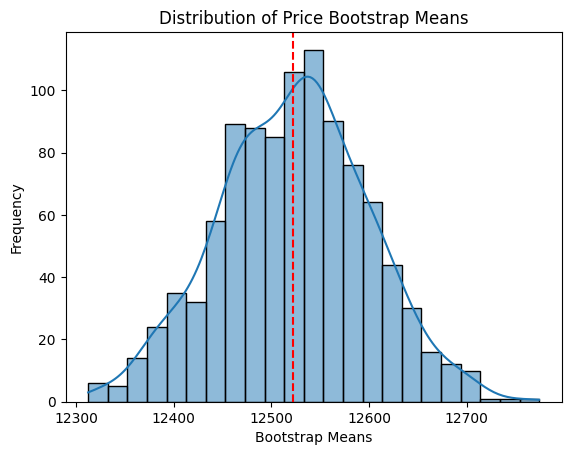

In [ ]:
ax = sns.histplot(price_bootstrap_means, kde=True)
ax.axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.title('Distribution of Price Bootstrap Means')
plt.show()

In [ ]:
price_sample_all_means  # sampling happens without replacement in the prev examples unlike bootstrapping

0      12522.391066
1      12522.391066
2      12522.391066
3      12522.391066
4      12522.391066
           ...     
995    12522.391066
996    12522.391066
997    12522.391066
998    12522.391066
999    12522.391066
Length: 1000, dtype: float64

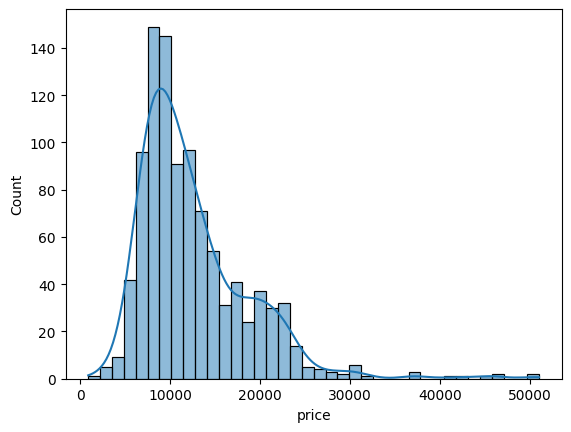

In [ ]:
price_bootstrap_sample = resample(df['price'], replace=True, n_samples=1000)
sns.histplot(price_bootstrap_sample, kde=True)
plt.show()

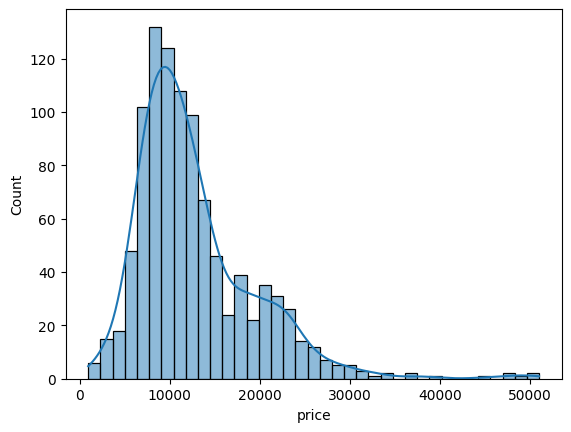

In [ ]:
sns.histplot(price_sample_1000, kde=True)
plt.show()

The distinction between bootstrapping and regular sampling lies in the method of sampling:

**Bootstrapping**

- **Sampling Method:** Sampling **with replacement**.
- **Process**: In bootstrapping, you repeatedly draw samples from the dataset with replacement. This means that each data point in the dataset can be chosen more than once for each bootstrap sample.
- **Purpose**: The goal is to create many resampled datasets (bootstrap samples) to estimate the variability and confidence intervals of a statistic. This method allows for the empirical estimation of the sampling distribution of the statistic.

**Regular Sampling** (e.g., for standard error calculation)
- **Sampling Method**: Sampling **without replacement** (in typical scenarios).
- **Process**: When you draw a sample without replacement, each data point can be selected only once for each sample. Once a data point is selected, it is not available for subsequent selections in that sample.
- **Purpose**: This method is used to obtain a representative subset of the data. Calculating the standard error from these samples provides an estimate of how much the sample mean might vary from the true population mean.

# Confidence Intervals

Mean of entire price data: 12522.39
Mean of sample20 price data: 10012.70


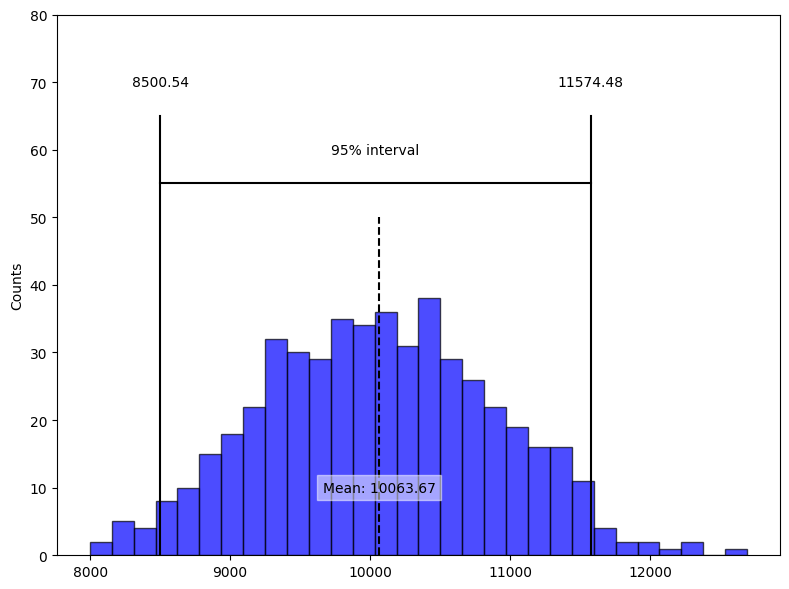

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Assuming df is your DataFrame and 'price' is the column of interest
prices = df['price']

# Calculate and print the mean of the entire 'price' column
print(f'Mean of entire price data: {prices.mean():.2f}')

# Set random seed for reproducibility
np.random.seed(seed=3)

# Create a sample of 20 price data points
sample20 = resample(prices, n_samples=20, replace=False)
print(f'Mean of sample20 price data: {sample20.mean():.2f}')

# Resample the sample20 data 500 times and calculate the mean of each sample
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

# Calculate the 95% confidence interval from the resampled means
confidence_interval = list(results.quantile([0.025, 0.975]))

# Plot the histogram of the resampled means
ax = results.plot.hist(bins=30, figsize=(8, 6), alpha=0.7, color='blue', edgecolor='black')

# Plot the confidence interval
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.2f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

# Plot the mean of the resampled means
mean_price = results.mean()
ax.plot([mean_price, mean_price], [0, 50], color='black', linestyle='--')
ax.text(mean_price, 10, f'Mean: {mean_price:.2f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Set the y-axis limit and label
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()


Mean of entire price data: 12522.39
Mean of sample1000 price data: 12499.33


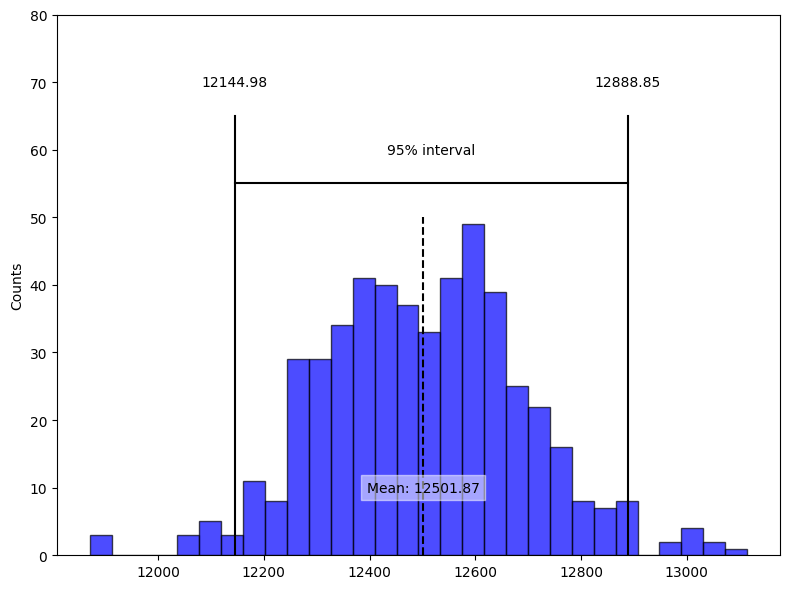

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Assuming df is your DataFrame and 'price' is the column of interest
prices = df['price']

# Calculate and print the mean of the entire 'price' column
print(f'Mean of entire price data: {prices.mean():.2f}')

# Set random seed for reproducibility
np.random.seed(seed=3)

# Create a sample of 1000 price data points
sample1000 = resample(prices, n_samples=1000, replace=False)
print(f'Mean of sample1000 price data: {sample1000.mean():.2f}')

# Resample the sample1000 data 500 times and calculate the mean of each sample
results = []
for nrepeat in range(500):
    sample = resample(sample1000)
    results.append(sample.mean())
results = pd.Series(results)

# Calculate the 95% confidence interval from the resampled means
confidence_interval = list(results.quantile([0.025, 0.975]))

# Plot the histogram of the resampled means
ax = results.plot.hist(bins=30, figsize=(8, 6), alpha=0.7, color='blue', edgecolor='black')

# Plot the confidence interval
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.2f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

# Plot the mean of the resampled means
mean_price = results.mean()
ax.plot([mean_price, mean_price], [0, 50], color='black', linestyle='--')
ax.text(mean_price, 10, f'Mean: {mean_price:.2f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Set the y-axis limit and label
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()


a sample of 1000 is very good enough for the sample mean to approximate the population mean with reasonable accuracy.

Mean of entire price data: 12522.39
Mean of sample1000 price data: 12499.33


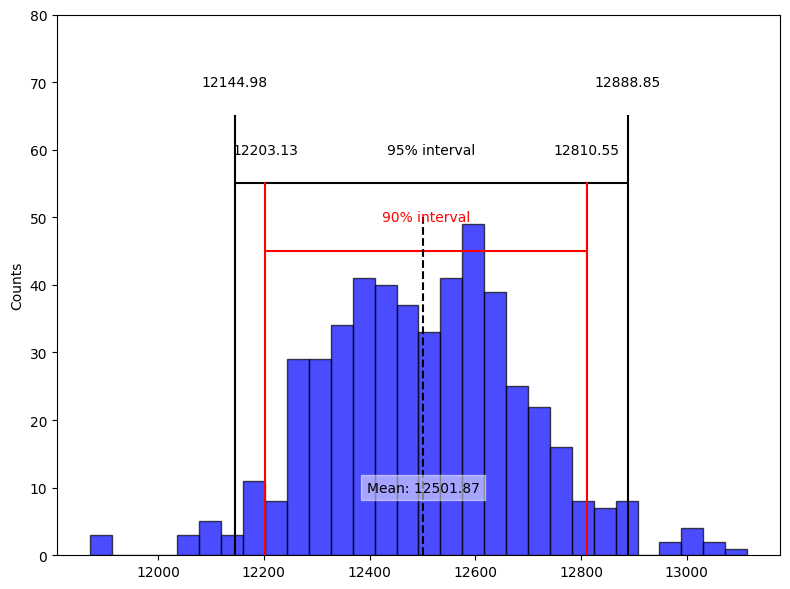

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Assuming df is your DataFrame and 'price' is the column of interest
prices = df['price']

# Calculate and print the mean of the entire 'price' column
print(f'Mean of entire price data: {prices.mean():.2f}')

# Set random seed for reproducibility
np.random.seed(seed=3)

# Create a sample of 1000 price data points
sample1000 = resample(prices, n_samples=1000, replace=False)
print(f'Mean of sample1000 price data: {sample1000.mean():.2f}')

# Resample the sample1000 data 500 times and calculate the mean of each sample
results = []
for nrepeat in range(500):
    sample = resample(sample1000)
    results.append(sample.mean())
results = pd.Series(results)

# Calculate the 95% confidence interval from the resampled means
confidence_interval_95 = list(results.quantile([0.025, 0.975]))

# Calculate the 90% confidence interval from the resampled means
confidence_interval_90 = list(results.quantile([0.05, 0.95]))

# Plot the histogram of the resampled means
ax = results.plot.hist(bins=30, figsize=(8, 6), alpha=0.7, color='blue', edgecolor='black')

# Plot the 95% confidence interval
ax.plot(confidence_interval_95, [55, 55], color='black')
for x in confidence_interval_95:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.2f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval_95) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

# Plot the 90% confidence interval
ax.plot(confidence_interval_90, [45, 45], color='red')
for x in confidence_interval_90:
    ax.plot([x, x], [0, 55], color='red')
    ax.text(x, 60, f'{x:.2f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval_90) / 2, 50, '90% interval',
        horizontalalignment='center', verticalalignment='center', color='red')

# Plot the mean of the resampled means
mean_price = results.mean()
ax.plot([mean_price, mean_price], [0, 50], color='black', linestyle='--')
ax.text(mean_price, 10, f'Mean: {mean_price:.2f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Set the y-axis limit and label
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()


**90% Confidence Interval:**

- The 90% confidence interval means that if we were to take 100 different samples and compute the interval for each sample, we would expect about 90 of those intervals to contain the true population mean price.

Mean Squared Error: 3126831.48
R^2 Score: 0.93


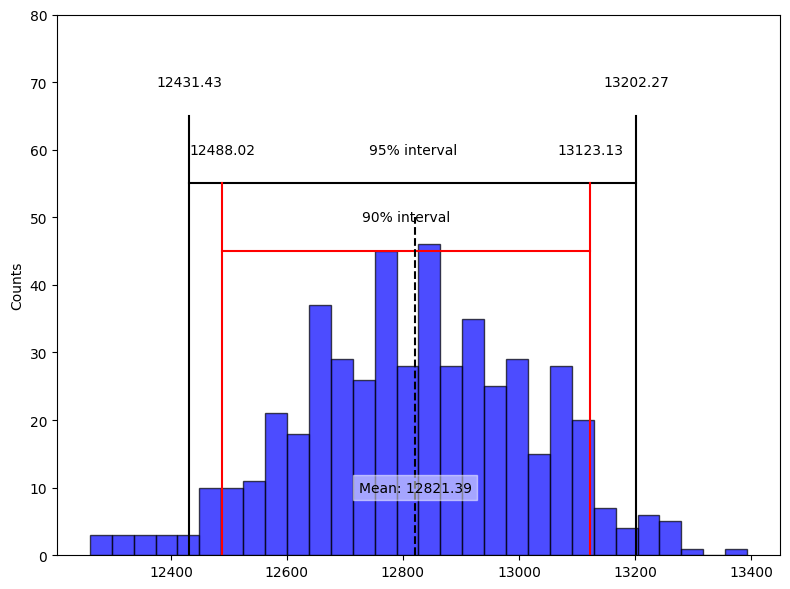

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample


# Define features and target variable
X = df[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'mileage', 'tax', 'mpg', 'engineSize']),
        ('cat', OneHotEncoder(), ['model', 'transmission', 'fuelType'])
    ])

# Create a pipeline with the preprocessor and a linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Use bootstrapping to create confidence intervals for the predicted prices
np.random.seed(seed=3)
sample1000 = resample(y_pred, n_samples=1000, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample1000)
    results.append(sample.mean())
results = pd.Series(results)

# Calculate 90% and 95% confidence intervals
confidence_interval_90 = list(results.quantile([0.05, 0.95]))
confidence_interval_95 = list(results.quantile([0.025, 0.975]))

# Plot the histogram of the resampled mean predictions
ax = results.plot.hist(bins=30, figsize=(8, 6), alpha=0.7, color='blue', edgecolor='black')

# Plot the 95% confidence interval
ax.plot(confidence_interval_95, [55, 55], color='black')
for x in confidence_interval_95:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.2f}', horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval_95) / 2, 60, '95% interval', horizontalalignment='center', verticalalignment='center')

# Plot the 90% confidence interval
ax.plot(confidence_interval_90, [45, 45], color='red')
for x in confidence_interval_90:
    ax.plot([x, x], [0, 55], color='red')
    ax.text(x, 60, f'{x:.2f}', horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval_90) / 2, 50, '90% interval', horizontalalignment='center', verticalalignment='center')

# Plot the mean of the resampled means
mean_price = results.mean()
ax.plot([mean_price, mean_price], [0, 50], color='black', linestyle='--')
ax.text(mean_price, 10, f'Mean: {mean_price:.2f}', bbox=dict(facecolor='white', edgecolor='white', alpha=0.5), horizontalalignment='center', verticalalignment='center')

# Set the y-axis limit and label
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()


# Normal Distribution
- It is a common misconception that the normal distribution is called that because most data follows a normal distribution—that is, it is the normal thing. Most of the variables used in a typical data science project—in fact, **most raw data as a whole—are not normally distributed**:  
- **The utility of the normal distribution derives from the fact that many statistics are normally distributed in their sampling distribution**. Even so, assumptions of normality are generally a last resort, used when empirical probability distributions, or bootstrap distributions, are not available.

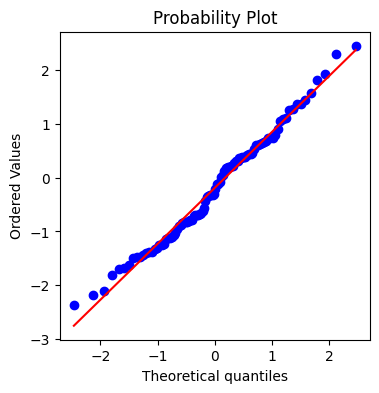

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)  # 100 sample from a norm dist
stats.probplot(norm_sample, plot=ax)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

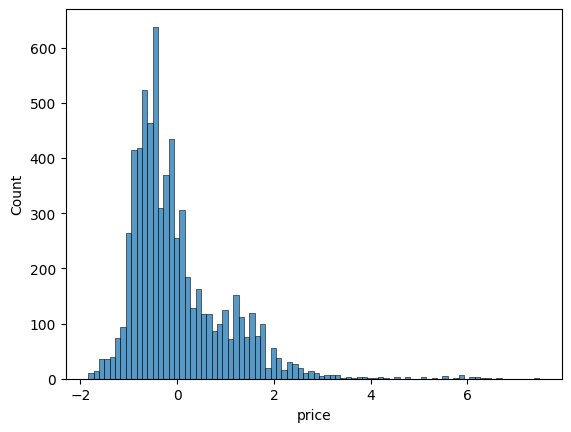

In [ ]:
# normalization or standardization
price_z_scores = (df['price'] - df['price'].mean()) / df['price'].std()
sns.histplot(price_z_scores)

- Converting data to z-scores (i.e., standardizing or normalizing the data) does not make the data normally distributed. It just puts the data on the same scale as the standard normal distribution, often for comparison purposes.

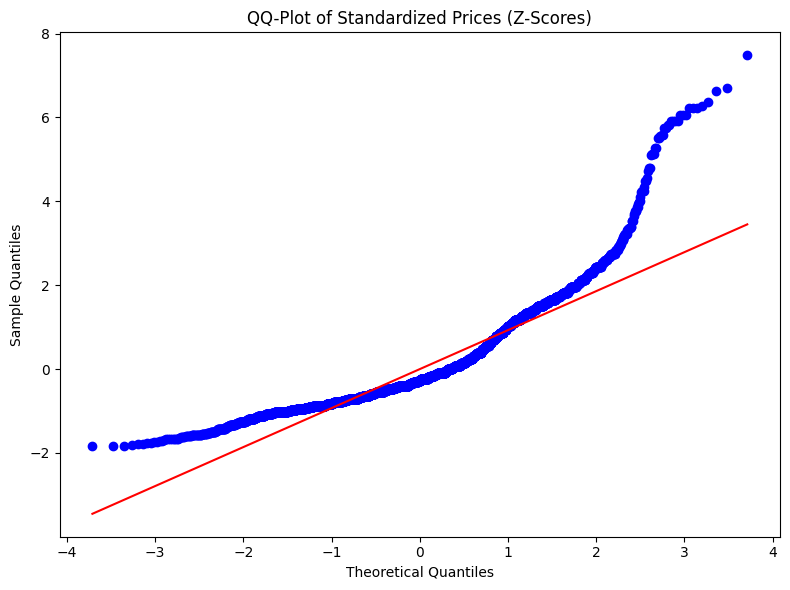

In [ ]:
# Standardize the data (convert to z-scores)
z_scores = (prices - prices.mean()) / prices.std()

# Create a QQ-Plot for the z-scores
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(z_scores, dist="norm", plot=ax)
ax.set_title('QQ-Plot of Standardized Prices (Z-Scores)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.tight_layout()
plt.show()

- the points are close to the line for the data **within one standard deviation of the mean**. Tukey refers to this phenomenon as data being “**normal in the middle**” but having much longer tails

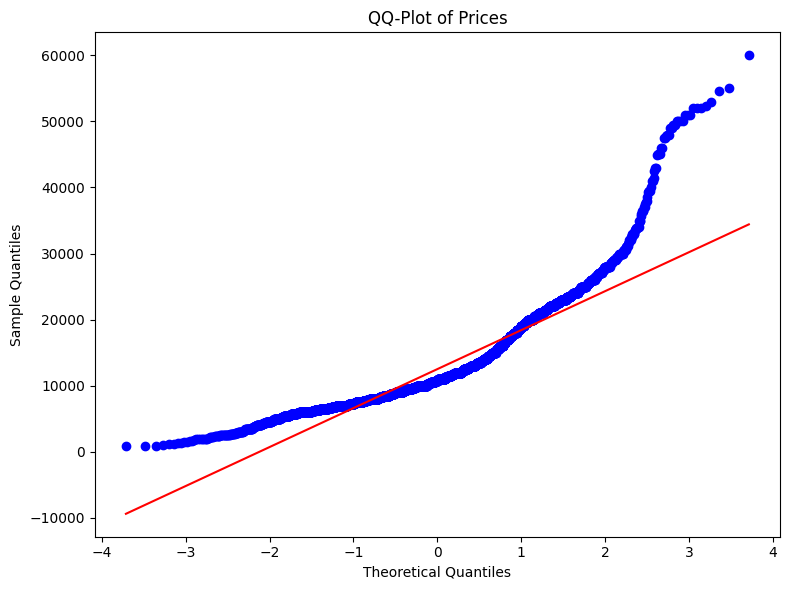

In [ ]:

# Extract the 'price' column
prices = df['price']

# Create a QQ-Plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(prices, dist="norm", plot=ax)
ax.set_title('QQ-Plot of Prices')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.tight_layout()
plt.show()

- **Points Above the Line**: If the QQ-Plot shows that many data points are above the line, especially in the higher quantiles, it means that there are more high values (outliers) in your data than expected for a normal distribution. This might indicate a **right-skewed** distribution.
- **Points Below the Line**: Conversely, if many data points are below the line, especially in the lower quantiles, it suggests more low values (outliers) than expected, indicating a **left-skewed** distribution.

<br>

> we can see prices are right-skewed

<br>

**Points Above the Line**:
- **Interpretation**: If the points are above the line, it suggests that your data has higher values than what would be expected if it were normally distributed. This often indicates positive skewness in your data.
- **Positive Skewness**: This means that the right tail of the distribution is longer or fatter than the left tail. In other words, there are **more extreme high values** in your data than would be expected under a normal distribution.

**Points Below the Line**:
- **Interpretation**: If the points are below the line, it suggests that your data has lower values than expected under a normal distribution. This often indicates negative skewness in your data.
- **Negative Skewness**: This means that the left tail of the distribution is longer or fatter than the right tail. In other words, there are **more extreme low values** in your data than would be expected under a normal distribution.

**Interpretation of Skewness**
- Skewness = 0: The distribution is perfectly symmetrical.
- Skewness > 0: The distribution has **positive skewness **(right-skewed).
- Skewness < 0: The distribution has **negative skewness **(left-skewed).

<Axes: xlabel='price', ylabel='Count'>

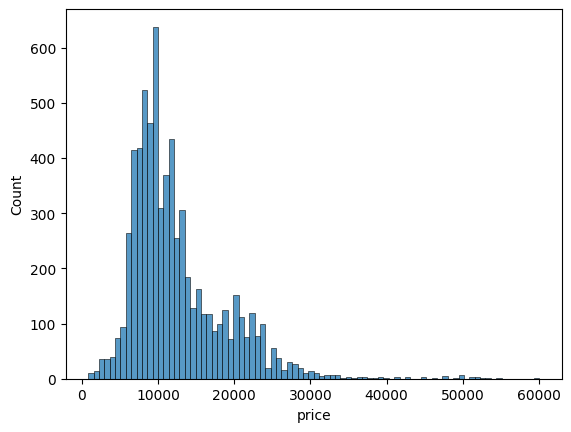

In [ ]:
sns.histplot(prices)

In [ ]:
print(f'Skewness: {prices.skew():.4f}')

Skewness: 1.8167


**Suppose you calculate a skewness value of 1.5:**

- This indicates positive skewness. Your data has a **longer or fatter tail on the right side**.
- You might want to apply a transformation (e.g., logarithm) to reduce skewness and normalize the data if required for certain analyses.
- Quantifying skewness helps you understand how your data **deviates from normality, which is crucial for applying appropriate statistical methods** and transformations.


### Guidelines for Interpreting Skewness
- **Near Zero (|Skewness| < 0.5):**

 **Interpretation**: The distribution is approximately symmetric. Skewness is low, and the data is close to normal.

 **Action**: No special action needed; the data can be treated as normally distributed for most purposes.

- **Moderate Skewness (0.5 ≤ |Skewness| < 1.0):**

 **Interpretation**: The distribution shows moderate skewness. The data has noticeable asymmetry but is not extreme.

 **Action**: Consider transformations (e.g., logarithmic, square root) to reduce skewness if normality is required for analysis or modeling.

- **High Skewness (|Skewness| ≥ 1.0):**

 **Interpretation**: The distribution is highly skewed. Positive skewness indicates a right-skewed distribution with a longer right tail, while negative skewness indicates a left-skewed distribution with a longer left tail.

 **Action**: Strongly consider transformations to address skewness. Models or statistical tests that assume normality may not perform well.

Original Skewness: 1.82
Log Transformation Skewness: -0.09
Square Root Transformation Skewness: 0.86


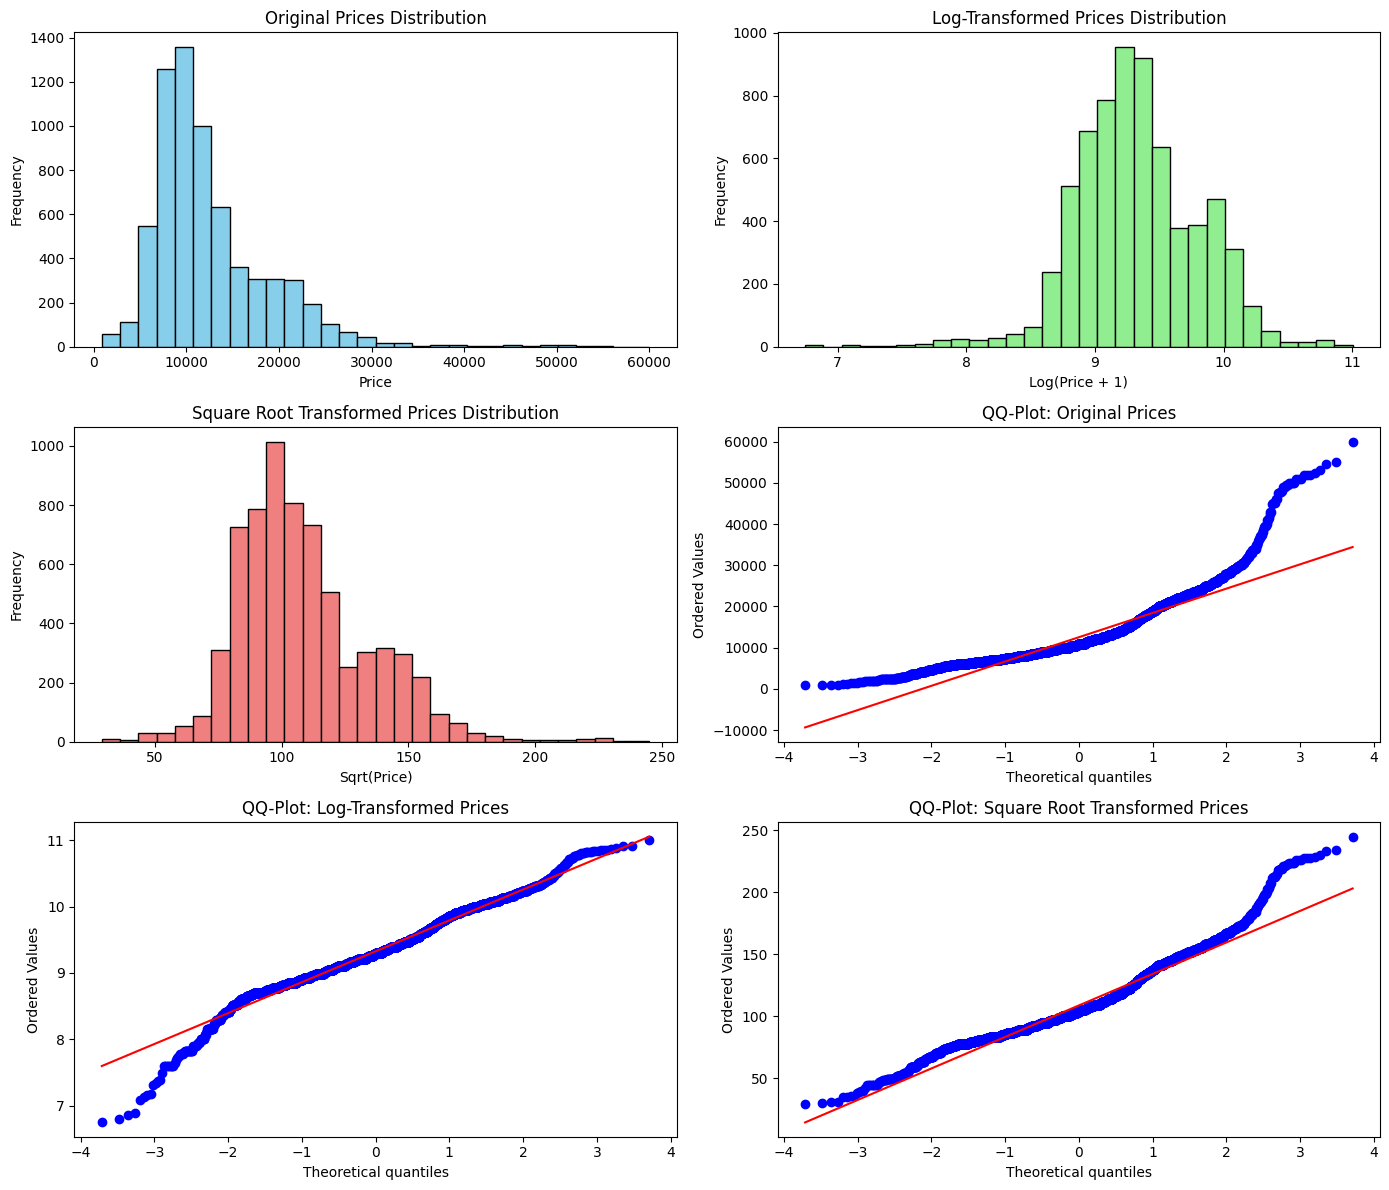

In [ ]:
from scipy.stats import skew
from sklearn.preprocessing import FunctionTransformer

# Assuming df is your DataFrame and 'price' is the column of interest
prices = df['price']

# Calculate the skewness of the original data
original_skewness = skew(prices)
print(f'Original Skewness: {original_skewness:.2f}')

# Apply logarithmic transformation
log_prices = np.log1p(prices)  # np.log1p(x) is log(1 + x) to handle zero values
log_skewness = skew(log_prices)
print(f'Log Transformation Skewness: {log_skewness:.2f}')

# Apply square root transformation
sqrt_prices = np.sqrt(prices)
sqrt_skewness = skew(sqrt_prices)
print(f'Square Root Transformation Skewness: {sqrt_skewness:.2f}')

# Plotting the distributions
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Original data
axs[0, 0].hist(prices, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Original Prices Distribution')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

# Log-transformed data
axs[0, 1].hist(log_prices, bins=30, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Log-Transformed Prices Distribution')
axs[0, 1].set_xlabel('Log(Price + 1)')
axs[0, 1].set_ylabel('Frequency')

# Square root transformed data
axs[1, 0].hist(sqrt_prices, bins=30, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Square Root Transformed Prices Distribution')
axs[1, 0].set_xlabel('Sqrt(Price)')
axs[1, 0].set_ylabel('Frequency')

# QQ-Plots for each transformation
from scipy.stats import norm, probplot

# QQ-Plot for Original Prices
probplot(prices, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ-Plot: Original Prices')

# QQ-Plot for Log-Transformed Prices
probplot(log_prices, dist="norm", plot=axs[2, 0])
axs[2, 0].set_title('QQ-Plot: Log-Transformed Prices')

# QQ-Plot for Square Root Transformed Prices
probplot(sqrt_prices, dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('QQ-Plot: Square Root Transformed Prices')

plt.tight_layout()
plt.show()


**Original Skewness: 1.82**
- The positive skewness indicates a right-skewed distribution, meaning that there are relatively few high values that are pulling the mean to the right. This suggests that the prices data has a long tail on the right side.

**Log Transformation Skewness: -0.09**
- The log transformation has significantly reduced the skewness to near-zero, indicating that the distribution is **much closer to normal**. The negative value is very close to zero, suggesting that the log transformation has **effectively normalized the data**.

**Square Root Transformation Skewness: 0.86**
- The square root transformation also reduces skewness but not as effectively as the log transformation. The resulting skewness of 0.86 still indicates some right skewness, but it is less pronounced than in the original data.

<Axes: xlabel='mileage', ylabel='Count'>

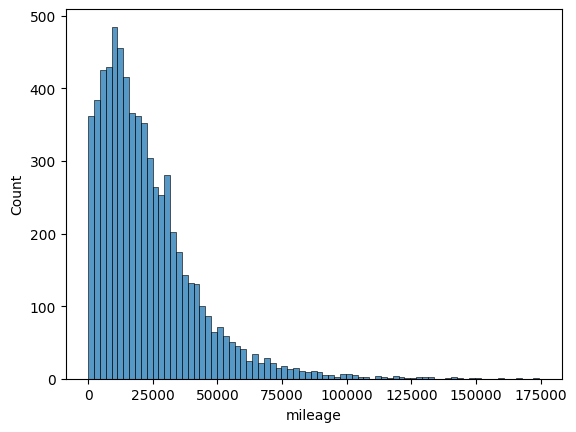

In [ ]:
sns.histplot(df['mileage'])

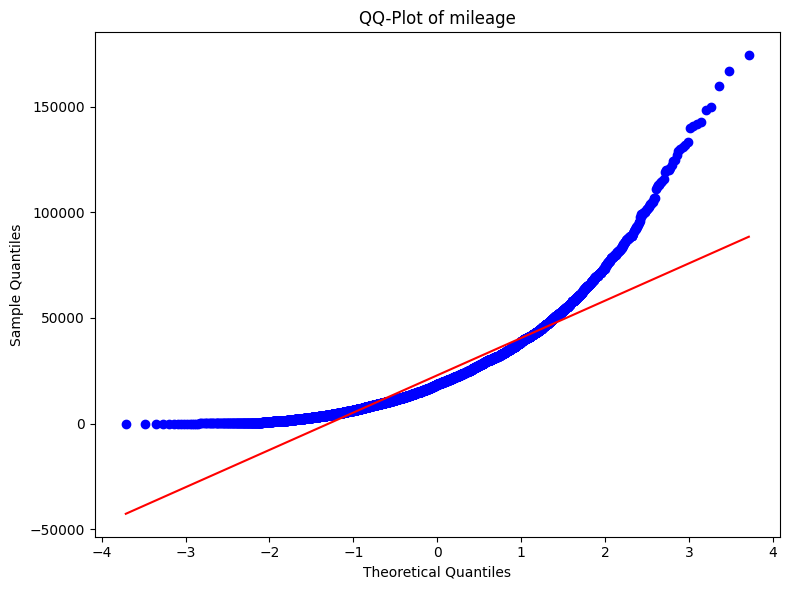

In [ ]:
# Create a QQ-Plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(df['mileage'], dist="norm", plot=ax)
ax.set_title('QQ-Plot of mileage')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.tight_layout()
plt.show()

Original Skewness: 1.90
Log Transformation Skewness: -0.09
Square Root Transformation Skewness: 0.86


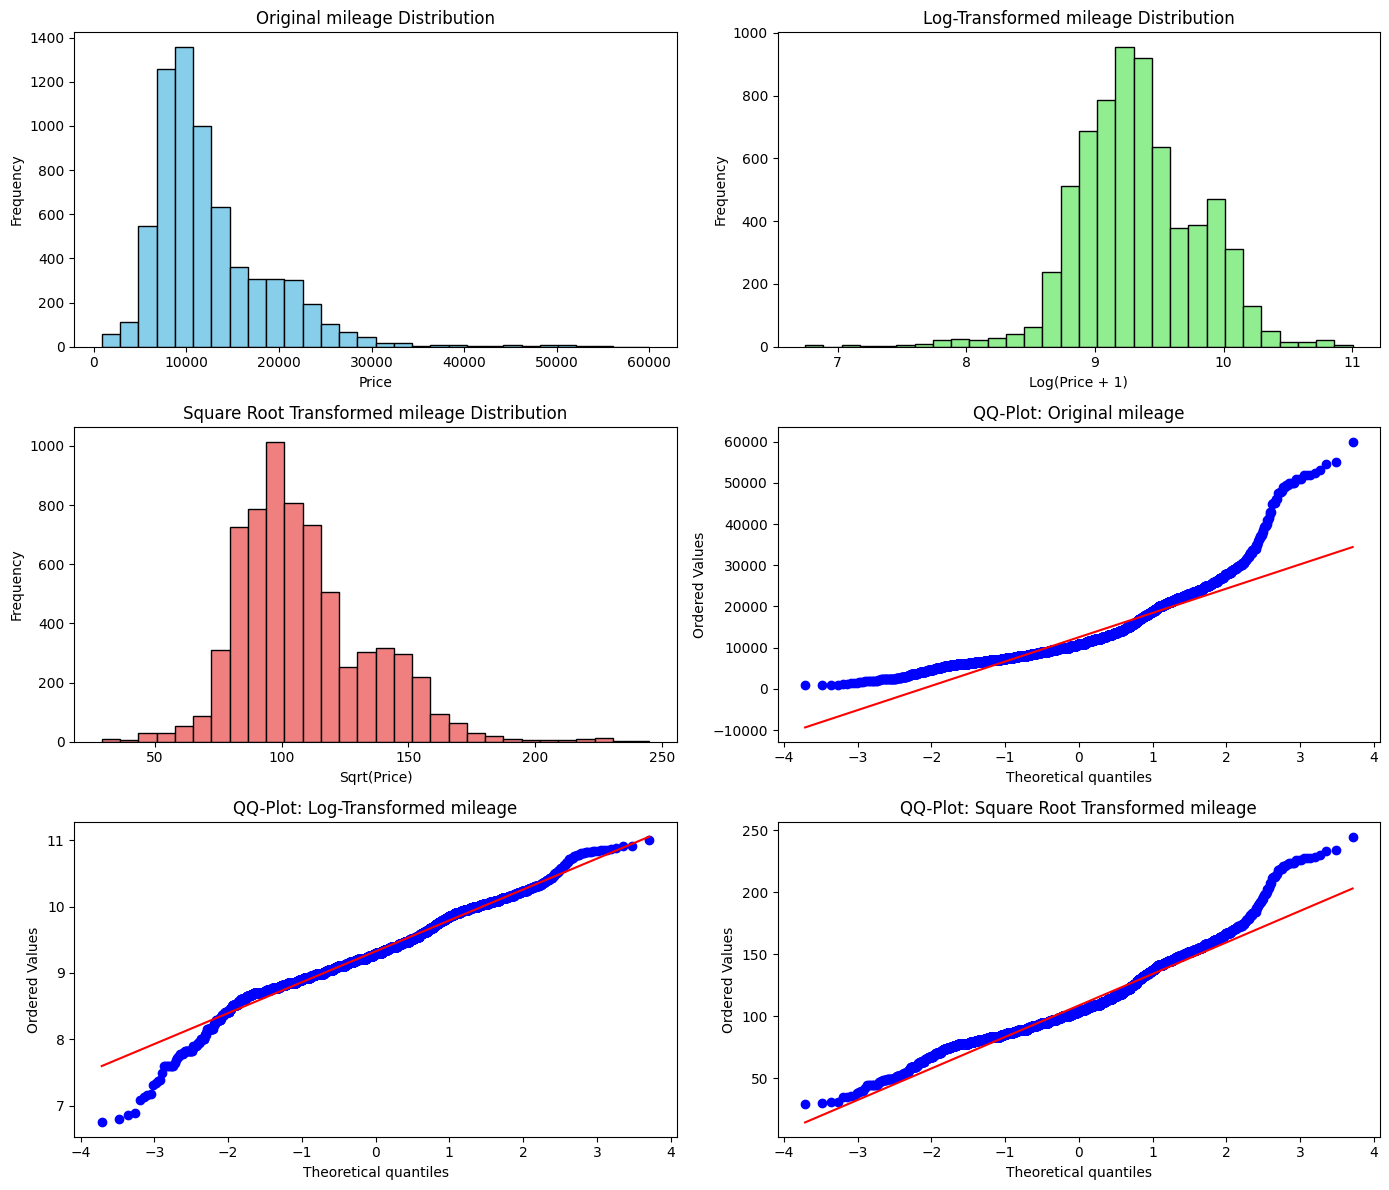

In [ ]:
from scipy.stats import skew
from sklearn.preprocessing import FunctionTransformer

# Calculate the skewness of the original data
original_skewness = skew(df['mileage'])
print(f'Original Skewness: {original_skewness:.2f}')

# Apply logarithmic transformation
log_prices = np.log1p(prices)  # np.log1p(x) is log(1 + x) to handle zero values
log_skewness = skew(log_prices)
print(f'Log Transformation Skewness: {log_skewness:.2f}')

# Apply square root transformation
sqrt_prices = np.sqrt(prices)
sqrt_skewness = skew(sqrt_prices)
print(f'Square Root Transformation Skewness: {sqrt_skewness:.2f}')

# Plotting the distributions
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Original data
axs[0, 0].hist(prices, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Original mileage Distribution')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

# Log-transformed data
axs[0, 1].hist(log_prices, bins=30, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Log-Transformed mileage Distribution')
axs[0, 1].set_xlabel('Log(Price + 1)')
axs[0, 1].set_ylabel('Frequency')

# Square root transformed data
axs[1, 0].hist(sqrt_prices, bins=30, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Square Root Transformed mileage Distribution')
axs[1, 0].set_xlabel('Sqrt(Price)')
axs[1, 0].set_ylabel('Frequency')

# QQ-Plots for each transformation
from scipy.stats import norm, probplot

# QQ-Plot for Original Prices
probplot(prices, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ-Plot: Original mileage')

# QQ-Plot for Log-Transformed Prices
probplot(log_prices, dist="norm", plot=axs[2, 0])
axs[2, 0].set_title('QQ-Plot: Log-Transformed mileage')

# QQ-Plot for Square Root Transformed Prices
probplot(sqrt_prices, dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('QQ-Plot: Square Root Transformed mileage')

plt.tight_layout()
plt.show()


# The t-distribution
- The t-distribution is essential in statistics for **making inferences about a population mean** when dealing with **small sample sizes** or when the **population standard deviation is unknown**. It provides a more accurate reflection of the variability and uncertainty in the sample mean under these conditions compared to the normal distribution.

In [ ]:
import scipy.stats as stats

prices = df['price']

# Calculate summary statistics
mean_price = prices.mean()
std_dev_price = prices.std()
sample_size = len(prices)

print(f"Mean Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Sample Size: {sample_size}")

# Normal distribution (z-distribution) confidence interval
z_critical = stats.norm.ppf(0.975)  # 95% confidence
margin_of_error_z = z_critical * (std_dev_price / np.sqrt(sample_size))
ci_normal = (mean_price - margin_of_error_z, mean_price + margin_of_error_z)

# t-distribution confidence interval
t_critical = stats.t.ppf(0.975, df=sample_size-1)  # 95% confidence
margin_of_error_t = t_critical * (std_dev_price / np.sqrt(sample_size))
ci_t = (mean_price - margin_of_error_t, mean_price + margin_of_error_t)

print(f"95% Confidence Interval using Normal Distribution: {ci_normal}")
print(f"95% Confidence Interval using t-Distribution: {ci_t}")


Mean Price: 12522.39
Standard Deviation: 6345.02
Sample Size: 6738
95% Confidence Interval using Normal Distribution: (12370.890094048558, 12673.892037147642)
95% Confidence Interval using t-Distribution: (12370.862870682457, 12673.919260513743)


In [ ]:
from sklearn.utils import resample

# Calculate population mean
population_mean = prices.mean()
print(f"Population Mean: {population_mean:.2f}")

# Set random seed for reproducibility
np.random.seed(seed=3)

# Create a sample of 100 price data points
sample = resample(prices, n_samples=100, replace=False)
sample_mean = sample.mean()
sample_std_dev = sample.std()
sample_size = len(sample)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")

# Normal distribution (z-distribution) confidence interval
z_critical = stats.norm.ppf(0.975)  # 95% confidence
margin_of_error_z = z_critical * (sample_std_dev / np.sqrt(sample_size))
ci_normal = (sample_mean - margin_of_error_z, sample_mean + margin_of_error_z)

# t-distribution confidence interval
t_critical = stats.t.ppf(0.975, df=sample_size-1)  # 95% confidence
margin_of_error_t = t_critical * (sample_std_dev / np.sqrt(sample_size))
ci_t = (sample_mean - margin_of_error_t, sample_mean + margin_of_error_t)

print(f"95% Confidence Interval using Normal Distribution: {ci_normal}")
print(f"95% Confidence Interval using t-Distribution: {ci_t}")


Population Mean: 12522.39
Sample Mean: 12550.26
Sample Standard Deviation: 5808.67
95% Confidence Interval using Normal Distribution: (11411.780824548241, 13688.73917545176)
95% Confidence Interval using t-Distribution: (11397.693066786109, 13702.826933213892)


Population Mean: 12522.39
Sample Mean: 12550.26
Sample Standard Deviation: 5808.67
90% Confidence Interval: [11607.623  13406.0585]
95% Confidence Interval: [11424.773   13701.88275]


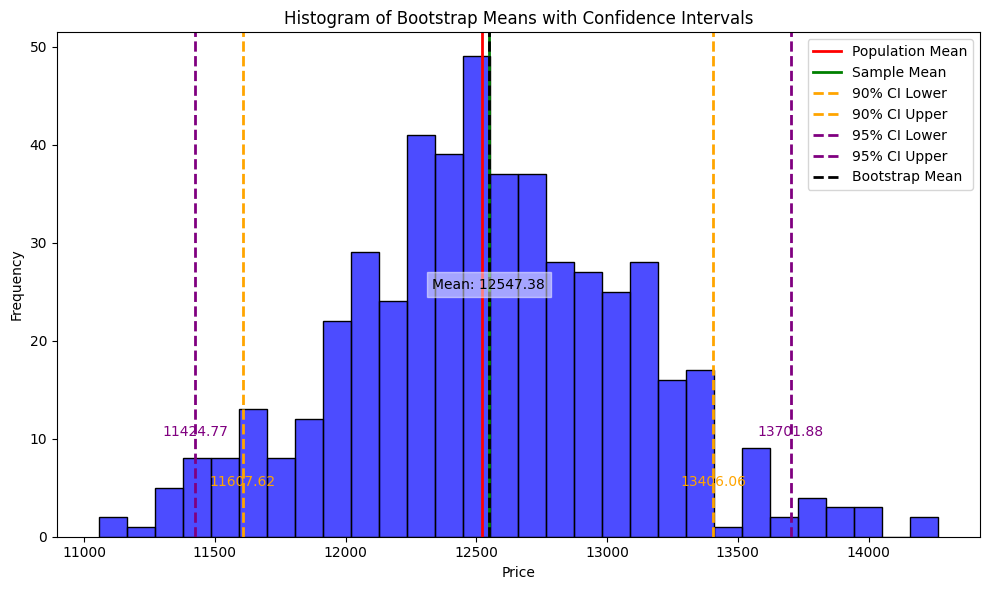

In [ ]:
# Assuming df is your DataFrame
prices = df['price']

# Calculate population mean
population_mean = prices.mean()
print(f"Population Mean: {population_mean:.2f}")

# Set random seed for reproducibility
np.random.seed(seed=3)

# Create a sample of 100 price data points
sample = resample(prices, n_samples=100, replace=False)
sample_mean = sample.mean()
sample_std_dev = sample.std()
sample_size = len(sample)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")

# Perform bootstrapping
bootstrap_means = []
n_bootstraps = 500

for _ in range(n_bootstraps):
    bootstrap_sample = resample(sample)
    bootstrap_means.append(bootstrap_sample.mean())

bootstrap_means = pd.Series(bootstrap_means)

# Calculate confidence intervals from the bootstrap distribution
ci_90 = bootstrap_means.quantile([0.05, 0.95])
ci_95 = bootstrap_means.quantile([0.025, 0.975])

print(f"90% Confidence Interval: {ci_90.values}")
print(f"95% Confidence Interval: {ci_95.values}")

# Plot the bootstrap distribution and confidence intervals using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=False, color='blue', edgecolor='black', alpha=0.7)

# Plot the population mean
plt.axvline(population_mean, color='red', linestyle='-', linewidth=2, label='Population Mean')

# Plot the sample mean
plt.axvline(sample_mean, color='green', linestyle='-', linewidth=2, label='Sample Mean')

# Plot the 90% confidence intervals
plt.axvline(ci_90.iloc[0], color='orange', linestyle='--', linewidth=2, label='90% CI Lower')
plt.axvline(ci_90.iloc[1], color='orange', linestyle='--', linewidth=2, label='90% CI Upper')
plt.text(ci_90.iloc[0], plt.ylim()[1] * 0.1, f'{ci_90.iloc[0]:.2f}', color='orange', ha='center')
plt.text(ci_90.iloc[1], plt.ylim()[1] * 0.1, f'{ci_90.iloc[1]:.2f}', color='orange', ha='center')

# Plot the 95% confidence intervals
plt.axvline(ci_95.iloc[0], color='purple', linestyle='--', linewidth=2, label='95% CI Lower')
plt.axvline(ci_95.iloc[1], color='purple', linestyle='--', linewidth=2, label='95% CI Upper')
plt.text(ci_95.iloc[0], plt.ylim()[1] * 0.2, f'{ci_95.iloc[0]:.2f}', color='purple', ha='center')
plt.text(ci_95.iloc[1], plt.ylim()[1] * 0.2, f'{ci_95.iloc[1]:.2f}', color='purple', ha='center')

# Plot the mean of the bootstrap means
mean_price = bootstrap_means.mean()
plt.axvline(mean_price, color='black', linestyle='--', linewidth=2, label='Bootstrap Mean')
plt.text(mean_price, plt.ylim()[1] * 0.5, f'Mean: {mean_price:.2f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Means with Confidence Intervals')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The three methods for estimating the 95% confidence interval (CI) for the mean of df['price'] are:

**Normal Distribution:**
- Assumes the population is normally distributed.

**t-Distribution:**
- Used when the sample size is small and the population standard deviation is unknown.

**Bootstrapping:**

- **Non-parametric** method that does not assume any specific distribution.
- Involves resampling the data with replacement and calculating the statistic of interest multiple times to create a distribution of the statistic.



When the skewness of the data is high (1.8 in this case), it indicates that the data is not normally distributed. This affects the accuracy of confidence intervals calculated assuming normality. In such cases, bootstrapping becomes particularly useful as it doesn't rely on the assumption of normality.

Steps to Address High Skewness
- **Transform the Data**: Transformations like logarithmic or square root can reduce skewness and make the data more normally distributed.
- **Use Non-Parametric Methods**: Bootstrapping can provide more reliable confidence intervals without assuming normality.

# Binomial Distribution
The binomial distribution would answer a question like:

**If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?**

In the given example:
- **Experiment**: A click converting to a sale.
- **Probability of success** (p): The probability of a click converting to a sale is 0.02.
- **Number of trials** (n): The number of clicks is 200.
- **Number of successe**s (k): The number of sales, which is 0 in this case.

<br>

- With large n, and provided p is not too close to 0 or 1, the binomial distribution can be **approximated by the normal distribution.**

In [ ]:
from os import stat
n = 200
p = 0.02
stats.binom.pmf(0, n, p), stats.binom.pmf(5, 200, 0.02)

(0.017587946605721567, 0.15787888557385002)

- Probability of 5 sales in 200 clicks (0.157): This is approximately 15.7%, meaning there's an 15.7% chance of observing exactly 5 sales out of 200 clicks.

The mean of a binomial distribution is **n × p;** you can also think of this as the expected number of successes in n trials, for success probability = p.

In [ ]:
10 * 0.2

2.0

In [ ]:
# Parameters
n = 200  # Number of emails sent
p = 0.02  # Conversion rate

# Probability of observing 0 sales
prob_0_sales = stats.binom.pmf(0, n, p)
print(f"Probability of 0 sales in 200 emails: {prob_0_sales:.6f}")


Probability of 0 sales in 200 emails: 0.017588


**Interpretation**:
There's approximately a 1.76% chance of getting 0 sales. If the company observes 0 sales, this is relatively unlikely and could indicate an issue with the campaign

In [ ]:
# Probability of observing 5 sales
prob_5_sales = stats.binom.pmf(5, n, p)
print(f"Probability of 5 sales in 200 emails: {prob_5_sales:.6f}")


Probability of 5 sales in 200 emails: 0.157879


There's approximately an 15.7% chance of getting exactly 5 sales. This is a **more common outcome** compared to 0 sales. If the campaign yields 5 sales, it's a fairly expected result and suggests the campaign's performance is within a reasonable range.

In [ ]:
df['transmission'].value_counts(normalize=True)

transmission
Manual       0.567824
Automatic    0.394331
Semi-Auto    0.037697
Other        0.000148
Name: proportion, dtype: float64

In [ ]:
import pandas as pd
from scipy import stats

# Load the dataset (assuming df is your DataFrame)
# df = pd.read_csv('path_to_your_file.csv')

# Calculate the proportion of cars with automatic transmission
prop_automatic = df['transmission'].value_counts(normalize=True)['Automatic']

# Define the sample size and number of successes
n = 200  # Sample size
k = 80   # Number of cars with automatic transmission in the sample

# Calculate the probability of exactly 30 successes
probability_80_successes = stats.binom.pmf(k, n, prop_automatic)

# Calculate the probability of observing 30 or fewer successes
probability_80_or_fewer_successes = stats.binom.cdf(k, n, prop_automatic)

print(f"Probability of exactly 80 cars with automatic transmission in a sample of 200: {probability_80_successes}")
print(f"Probability of observing 80 or fewer cars with automatic transmission in a sample of 200: {probability_80_or_fewer_successes}")


Probability of exactly 80 cars with automatic transmission in a sample of 200: 0.056738972516964095
Probability of observing 80 or fewer cars with automatic transmission in a sample of 200: 0.5952721444169506


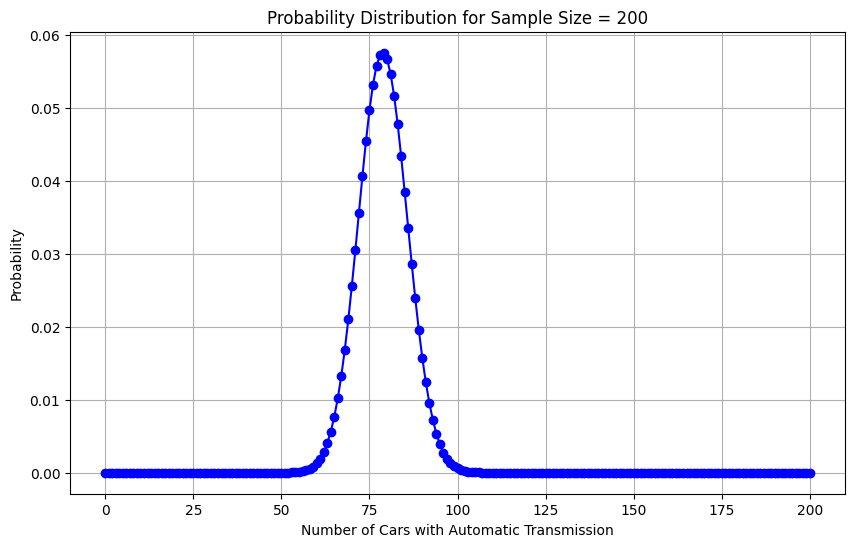

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame and it has been loaded
# df = pd.read_csv('path_to_your_file.csv')

# Calculate the proportion of cars with automatic transmission
prop_automatic = df['transmission'].value_counts(normalize=True)['Automatic']

# Define sample size
sample_size = 200

# Define range of k values (number of successes)
k_values = range(0, sample_size + 1)

# Calculate probabilities for each k value
probabilities = [stats.binom.pmf(k, sample_size, prop_automatic) for k in k_values]

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(k_values, probabilities, marker='o', linestyle='-', color='b')
plt.xlabel('Exact Number of Cars with Automatic Transmission')
plt.ylabel('Probability')
plt.title(f'Probability Distribution for Sample Size = {sample_size}')
plt.grid(True)
plt.show()


Probability Distribution: The plot will show how the probability of having a certain number of cars with automatic transmission varies within a sample of 200 cars. This visualization helps to understand the distribution and likelihood of different outcomes in such a sample.

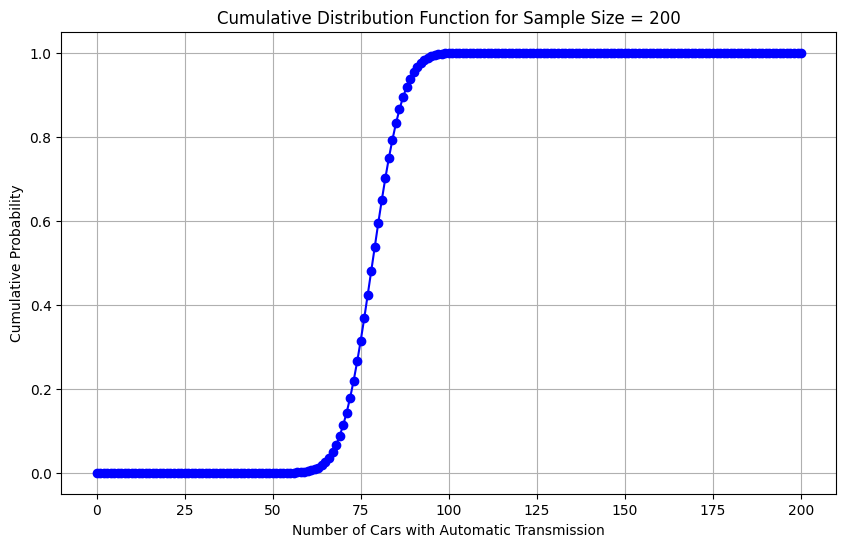

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame and it has been loaded
# df = pd.read_csv('path_to_your_file.csv')

# Calculate the proportion of cars with automatic transmission
prop_automatic = df['transmission'].value_counts(normalize=True)['Automatic']

# Define sample size
sample_size = 200

# Define range of k values (number of successes)
k_values = range(0, sample_size + 1)

# Calculate CDF for each k value
cdf_values = [stats.binom.cdf(k, sample_size, prop_automatic) for k in k_values]

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(k_values, cdf_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Cars with Automatic Transmission')
plt.ylabel('Cumulative Probability')
plt.title(f'Cumulative Distribution Function for Sample Size = {sample_size}')
plt.grid(True)
plt.show()


# Chi-Square Distribution
The Chi-Square distribution is a fundamental concept in statistics, especially when dealing with **categorical data**. It’s used to assess how well observed data fit with expected data based on a specific hypothesis. Here's a breakdown of the concept:

- **Expectation vs. Observation**: In statistics, you often start with an assumption or hypothesis about how data should behave. For instance, you might expect that there is **no association between two categorical variables** (like gender and voting preference). This is known as **the null hypothesis.**

- **Observed Data**: These are the actual counts or frequencies you collect from your data.

- **Expected Data**: This is what you would expect to see if the null hypothesis were true. It’s based on the assumption that there is no effect or no association.

- **Departure from Expectation**: The Chi-Square test helps determine if the observed data significantly deviates from the expected data. Essentially, it measures whether the differences between observed and expected counts are due to random chance or if they are significant.

<br>

- If the Chi-Square statistic is **large**, it indicates a significant departure from the expected counts, suggesting that the observed data do not fit well with the expected data (which could mean that the null hypothesis is false).
- If the statistic is **small**, the observed data are consistent with the expected data, supporting the null hypothesis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Suppose you're working with a dataset of used cars, and you want to understand **if there’s an association between the type of transmission (Manual vs. Automatic) and the price of the cars.**

<br>

**Formulate Hypotheses**

- **Null Hypothesis (H0)**: There is no significant association between transmission type and car price. The distribution of prices is the same regardless of whether the car has a manual or automatic transmission.
- **Alternative Hypothesis (H1)**: There is a significant association between transmission type and car price. The distribution of prices differs between manual and automatic cars.

**Conduct a Chi-Square Test**

Since the price is continuous, you might first discretize it into price bins to create categorical data for the Chi-Square test. Alternatively, you could use other statistical tests like **t-tests or ANOVA for continuous data**.

**Visualize Data**

Generate some visualizations to understand the distribution of prices across transmission types and to observe any noticeable differences.

In [ ]:
df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,2657.0,16582.828754,6331.004023,899.0,11991.00,14999.0,20990.00,59995.0
Manual,3826.0,9551.496864,3623.471963,850.0,7290.00,8995.0,10995.00,31000.0
Other,1.0,12795.000000,NaN,12795.0,12795.00,12795.0,12795.00,12795.0
Semi-Auto,254.0,14797.137795,11872.081853,3750.0,8708.75,9995.0,13855.75,54991.0


<Axes: xlabel='transmission', ylabel='price'>

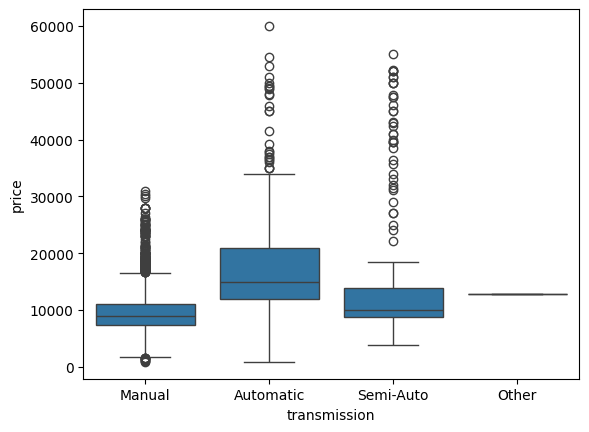

In [ ]:
sns.boxplot(x='transmission', y='price', data=df)

In [ ]:
df['price_bin'] = pd.cut(df['price'], bins=[0, 8000, 12000, 16000], labels=['Low', 'Medium', 'High'])
df.groupby('transmission')['price_bin'].value_counts()

transmission  price_bin
Automatic     High          716
              Medium        642
              Low            85
Manual        Medium       1734
              Low          1490
              High          393
Other         High            1
              Low             0
              Medium          0
Semi-Auto     Medium        130
              Low            45
              High           33
Name: count, dtype: int64

In [ ]:
contingency_table = pd.crosstab(df['transmission'], df['price_bin'])
contingency_table


price_bin,Low,Medium,High
transmission,,,
Automatic,85,642,716
Manual,1490,1734,393
Other,0,0,1
Semi-Auto,45,130,33


In [ ]:
# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')

# Interpretation
if p < 0.05:
    print("There is a significant association between transmission type and car price.")
else:
    print("There is no significant association between transmission type and car price.")


Chi-Square Statistic: 1157.8219954127237
p-value: 6.424541942459311e-247
Degrees of Freedom: 6
There is a significant association between transmission type and car price.


This analysis helps determine if the type of transmission has a significant impact on car prices. The Chi-Square test provides a **statistical measure of association**, while visualizations offer an intuitive understanding of the data.

> Given the extremely low p-value, you **reject the null hypothesis**. There is a significant association between the type of transmission and car prices. In other words, the distribution of car prices differs significantly based on whether a car has a manual or automatic transmission.

# F-Distribution
- The F-distribution is a **continuous probability distribution** used primarily in **statistical hypothesis testing**, particularly in the context of analysis of variance (**ANOVA**) and regression analysis.
- The F-distribution arises when **comparing the variances of two normally distributed populations**. It is defined by two parameters: d 1 (degrees of freedom for the numerator) and d 2(degrees of freedom for the denominator).
- The F-distribution is **positively skewed**, meaning it has a long right tail. As the degrees of freedom increase, the distribution becomes more symmetric and approaches a normal distribution.

**ANOVA (Analysis of Variance)**:

- The F-distribution is used to determine whether there are **significant differences between the means of three or more groups**. In ANOVA, the F-statistic is the ratio of the variance between the group means to the variance within the groups.

**Regression Analysis**:

- In regression analysis, the F-distribution helps **test the overall significance of the regression model**. The F-statistic here assesses whether the model explains a significant portion of the variance in the dependent variable compared to a model with no predictors.

### **ANOVA with price Based on transmission Type**
Suppose you want to determine if there is a significant difference in the price of cars based on their transmission type (Manual vs. Automatic). You can perform an ANOVA test to compare the means of car prices across different transmission types.

- `f_oneway` performs the ANOVA test to compare the means of the two group

In [96]:
from scipy.stats import f_oneway

# Group prices by transmission type
manual_prices = df[df['transmission'] == 'Manual']['price']
automatic_prices = df[df['transmission'] == 'Automatic']['price']

# Perform ANOVA
f_statistic, p_value = f_oneway(manual_prices, automatic_prices)

print(f'F-statistic: {f_statistic:.3f}')
print(f'P-value: {p_value:.3f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in prices based on transmission type.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in prices based on transmission type.')

F-statistic: 3206.799
P-value: 0.000
Reject the null hypothesis: There is a significant difference in prices based on transmission type.


In [ ]:
df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,2657.0,16582.828754,6331.004023,899.0,11991.00,14999.0,20990.00,59995.0
Manual,3826.0,9551.496864,3623.471963,850.0,7290.00,8995.0,10995.00,31000.0
Other,1.0,12795.000000,NaN,12795.0,12795.00,12795.0,12795.00,12795.0
Semi-Auto,254.0,14797.137795,11872.081853,3750.0,8708.75,9995.0,13855.75,54991.0


### ANOVA with Multiple Groups


In [ ]:
for name, group in df.groupby('transmission'):
  print(name)
  print(group['price'].describe())


Automatic
count     2657.000000
mean     16582.828754
std       6331.004023
min        899.000000
25%      11991.000000
50%      14999.000000
75%      20990.000000
max      59995.000000
Name: price, dtype: float64
Manual
count     3826.000000
mean      9551.496864
std       3623.471963
min        850.000000
25%       7290.000000
50%       8995.000000
75%      10995.000000
max      31000.000000
Name: price, dtype: float64
Other
count        1.0
mean     12795.0
std          NaN
min      12795.0
25%      12795.0
50%      12795.0
75%      12795.0
max      12795.0
Name: price, dtype: float64
Semi-Auto
count      254.000000
mean     14797.137795
std      11872.081853
min       3750.000000
25%       8708.750000
50%       9995.000000
75%      13855.750000
max      54991.000000
Name: price, dtype: float64


In [ ]:
df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,2657.0,16582.828754,6331.004023,899.0,11991.00,14999.0,20990.00,59995.0
Manual,3826.0,9551.496864,3623.471963,850.0,7290.00,8995.0,10995.00,31000.0
Other,1.0,12795.000000,NaN,12795.0,12795.00,12795.0,12795.00,12795.0
Semi-Auto,254.0,14797.137795,11872.081853,3750.0,8708.75,9995.0,13855.75,54991.0


In [ ]:
# Group prices by transmission type
groups = [group['price'].values for name, group in df.groupby('transmission')]
# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print(f'F-statistic: {f_statistic:.3f}')
print(f'P-value: {p_value:.3f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in prices based on transmission type.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in prices based on transmission type.')

F-statistic: 920.684
P-value: 0.000
Reject the null hypothesis: There is a significant difference in prices based on transmission type.


In [ ]:
f_oneway(*groups)

F_onewayResult(statistic=920.684427673783, pvalue=0.0)

In [ ]:
f_oneway(*groups.values())

F_onewayResult(statistic=920.684427673783, pvalue=0.0)

In [97]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway


# Group prices by transmission type
automatic_prices = df[df['transmission'] == 'Automatic']['price']
manual_prices = df[df['transmission'] == 'Manual']['price']
other_prices = df[df['transmission'] == 'Other']['price']
semi_auto_prices = df[df['transmission'] == 'Semi-Auto']['price']

# Perform ANOVA
f_statistic, p_value = f_oneway(automatic_prices, manual_prices, other_prices, semi_auto_prices)

print(f'F-statistic: {f_statistic:.3f}')
print(f'P-value: {p_value:.3f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in prices based on transmission type.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in prices based on transmission type.')


F-statistic: 920.684
P-value: 0.000
Reject the null hypothesis: There is a significant difference in prices based on transmission type.


By including all transmission types in the f_oneway test, you** test for differences in means across multiple groups** rather than just two.

# Poisson Distribution
- The Poisson distribution tells us the distribution of **events per unit of time or space** when we sample many such units. It is useful when addressing queuing questions such as “How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any five second period?”
- The Poisson distribution is a **discrete probability distribution** used to model the number of events that occur within a fixed interval of time or space, given that these events happen with a constant mean rate and independently of the time since the last event. It is particularly useful for modeling rare or infrequent events.


In [ ]:
stats.poisson.rvs(mu=2, size=30)

array([3, 1, 3, 0, 2, 0, 2, 1, 1, 1, 1, 1, 4, 2, 2, 3, 3, 2, 3, 7, 0, 1,
       4, 0, 3, 3, 4, 2, 2, 2])

This code will generate 30 random numbers from a Poisson distribution with λ = 5. For example, if incoming customer service **calls average 2 per minute**, this code will simulate 30 minutes, returning the number of calls in each of those 30 minutes.

Suppose a call center receives an **average of 3 calls per hour**. To find the probability of receiving **exactly 2** calls in the next hour, you can use the Poisson distribution.

Plot the Distribution: A bar plot shows the probability of observing 0, 1, 2, ..., 10 calls.

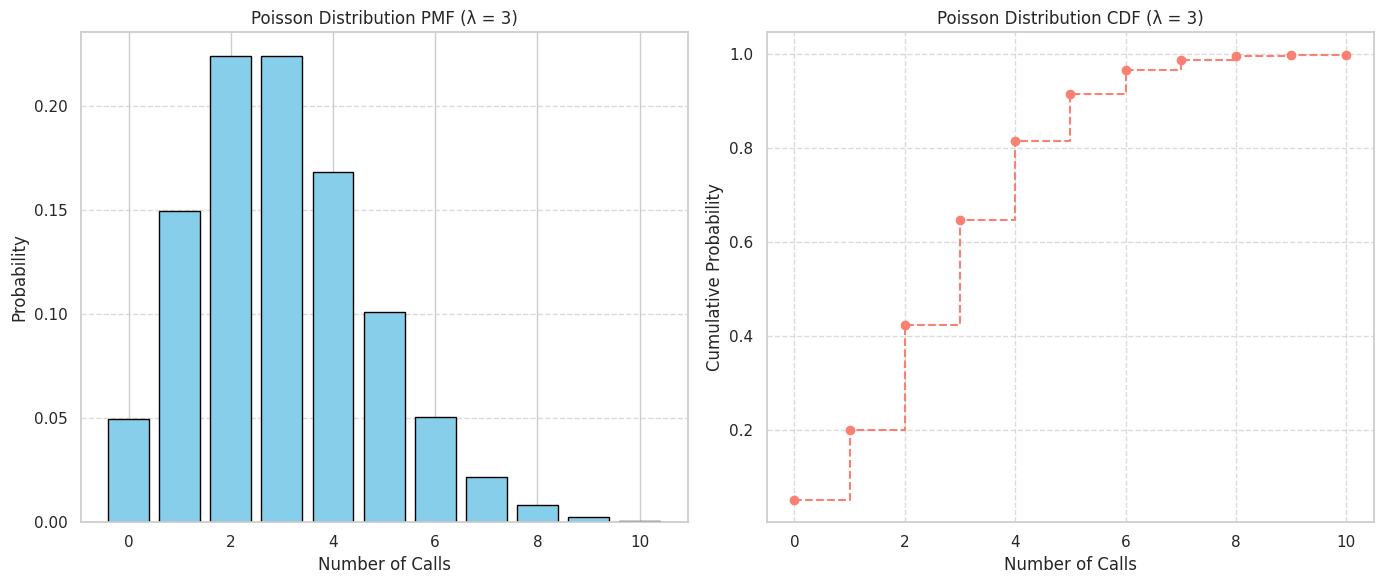

In [ ]:
from scipy.stats import poisson

# Average rate (λ)
lambda_ = 3

# Number of events
k_values = np.arange(0, 11)

# Probability mass function values
pmf_values = poisson.pmf(k_values, lambda_)

# CDF values
cdf_values = poisson.cdf(k_values, lambda_)

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the PMF
ax[0].bar(k_values, pmf_values, color='skyblue', edgecolor='black')
ax[0].set_ylabel('Probability')
ax[0].set_xlabel('Number of Calls')
ax[0].set_title('Poisson Distribution PMF (λ = 3)')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the CDF
ax[1].step(k_values, cdf_values, where='post', color='salmon', linestyle='--', marker='o')
ax[1].set_xlabel('Number of Calls')
ax[1].set_ylabel('Cumulative Probability')
ax[1].set_title('Poisson Distribution CDF (λ = 3)')
ax[1].grid(axis='both', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Exponential distribution
- The Exponential distribution is a **continuous probability distribution** often used to **model the time between events** in a Poisson process, where events occur continuously and independently at a constant average rate. It is frequently used in reliability analysis, queuing theory, and survival analysis.
- A key assumption in any simulation study for either the Poisson or exponential distribution is that **the rate, λ, remains constant over the period** being considered. This is rarely reasonable in a global sense; for example, traffic on roads or data networks varies by time of day and day of week.

In [ ]:
stats.expon.rvs(scale=2, size=30)

array([0.27218451, 0.88683248, 0.2831458 , 1.33021419, 2.52645592,
       4.61731463, 0.66347369, 0.16557789, 2.13018321, 2.48405772,
       1.76051618, 3.43789017, 6.12734818, 2.9915791 , 0.41379941,
       1.83915277, 0.30320654, 0.13770915, 1.70145454, 0.22078207,
       1.22691617, 0.89119604, 3.22670091, 1.19309426, 1.48234004,
       0.01759613, 3.1189155 , 2.86856528, 1.10118193, 9.43640403])

This code would generate 30 random numbers from an exponential distribution where the mean number of events per time period is 0.2. So you could use it to simulate 30 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute

 Suppose you are studying the time between arrivals of customers at a service desk. If **the average time between arrivals is 10 minutes**, this time can be modeled using an Exponential distribution.

 You are analyzing the time between customer arrivals at a service desk. You are interested in **understanding how likely it is that customers will arrive within certain time intervals** and what the overall probability is for various wait times.

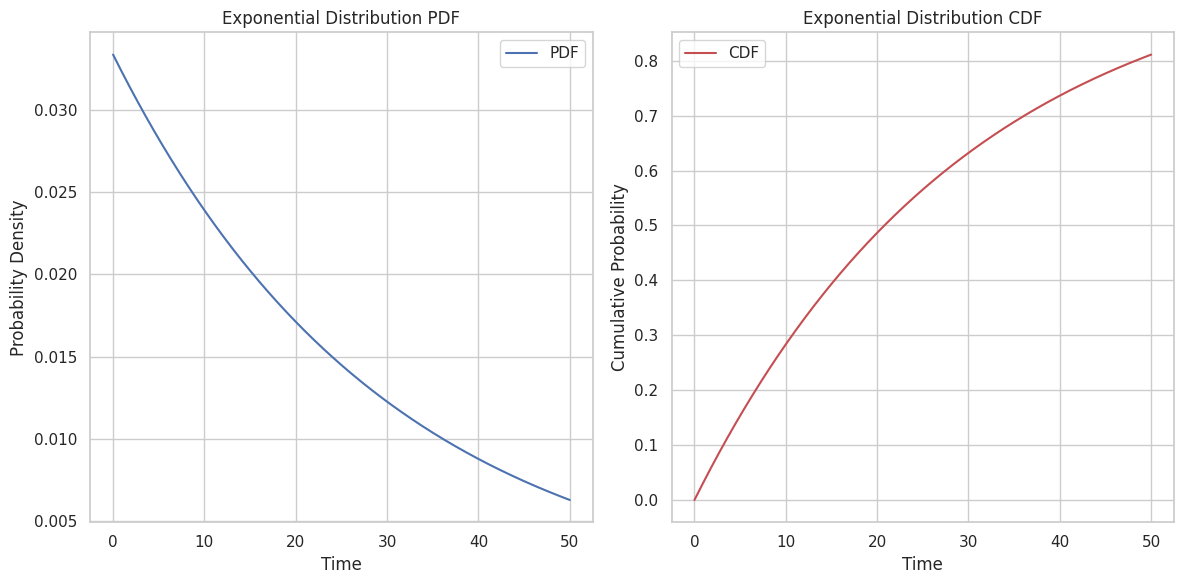

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
rate = 1 / 30  # Rate parameter (lambda) for an average time of 10 minutes - 1 person/10 min
scale = 1 / rate  # Scale parameter (inverse of lambda)

# Define the range for x values
x = np.linspace(0, 50 , 1000)

# Compute PDF and CDF
pdf = expon.pdf(x, scale=scale)
cdf = expon.cdf(x, scale=scale)

# Plot PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'b-', label='PDF')
plt.title('Exponential Distribution PDF')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'r-', label='CDF')
plt.title('Exponential Distribution CDF')
plt.xlabel('Time')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


**PDF**
- **Shorter Time Intervals**: If the PDF curve is high at shorter time intervals (e.g., within 5 minutes), it means that it's relatively likely to have a customer arrive within a short period after the last one.
- **Longer Time Intervals**: As the time interval increases (e.g., beyond 20 minutes), the PDF curve flattens, indicating that the likelihood of waiting a longer time without a customer arriving is lower.

**CDF**
- **Initial Rise**: If the CDF curve rises quickly at shorter time intervals (e.g., within 5 minutes), it indicates that a large proportion of customer arrivals happen within that time frame.
- **Approaching 1**: As the time interval extends (e.g., up to 30 minutes), the CDF approaches 1, indicating that the probability of having a customer arrive by that time is almost certain.

# Weibull distribution

In [ ]:
stats.weibull_min.rvs(c=3, scale=300, size=10)

array([412.61646269, 351.77576189, 297.00542111, 138.35830927,
       360.99029376, 283.54353845, 252.64004723, 269.41641753,
       217.05925046, 192.99118195])

# A/B testing
- A/B testing in data science is typically used in a web context. Treatments might be **the design of a web page, the price of a product, the wording of a headline**, or some other item. Some thought is required to preserve the principles of randomization. Typically the subject in the experiment is the web visitor, and the outcomes we are interested in measuring are **clicks, purchases, visit duration, number of pages visited,** whether a particular page is visited, and the like. In a standard A/B experiment, you need to **decide on one metric ahead of time.**

- Traditional statistical experimental designs focus on answering a static question about the efficacy of specified treatments.

 **Data scientists are less interested in the question:**

 Is the difference between price A and price B statistically significant? than in the question: **Which, out of multiple possible prices, is best?** For this, a relatively new type of experimental design is used: **the multi-arm bandit**

**Challenges of A/B Testing**
- **Sample Size**: Requires a sufficiently large sample size to achieve statistically significant results.
- **Time-Consuming**: Running tests and collecting data can take time, especially if you have low traffic.
- **Confounding Variables**: External factors can influence the results, making it crucial to control as many variables as possible.

**Scenario**

You are a car dealership manager, and you want to test whether offering a discount on cars with automatic transmission results in a higher average sales price compared to not offering a discount.

**Objective**

Determine if offering a discount on automatic transmission cars increases the average sales price.

**Steps**

- **Define the Objective**: Increase the average sales price of cars with automatic transmission.

- **Create Variants**:

 Variant A: Current pricing (no discount).

 Variant B: Apply a discount to the price of cars with automatic transmission.

- **Randomly Assign Users**: This will involve creating two groups in your dataset:

 Group A (control group): Cars with automatic transmission without a discount.

 Group B (test group): Cars with automatic transmission with a discount.

- **Run the Test**:
Apply the discount to Group B.
Compare the average sales price between the two groups.

- **Analyze Results:**
Calculate the average sales price for both groups and compare.

In [8]:
# Add a discount of 10% to the test group
discount_rate = 0.10

# Create Group A (control group) and Group B (test group)
group_a = df[df['transmission'] == 'Automatic']
group_b = group_a.copy()
group_b['price'] = group_b['price'] * (1 - discount_rate)

# Calculate the average sales price for both groups
avg_price_a = group_a['price'].mean()
avg_price_b = group_b['price'].mean()

# Print results
print(f"Average sales price for Group A (no discount): ${avg_price_a:.2f}")
print(f"Average sales price for Group B (with discount): ${avg_price_b:.2f}")

# Analysis
if avg_price_b > avg_price_a:
    print("Offering a discount increases the average sales price.")
else:
    print("Offering a discount does not increase the average sales price.")


Average sales price for Group A (no discount): $16582.83
Average sales price for Group B (with discount): $14924.55
Offering a discount does not increase the average sales price.


# Hypothesis Tests
In a properly designed A/B test, you collect data on treatments A and B in such a way that any observed difference between A and B must be due to either:
- Random chance in assignment of subjects
- A true difference between A and B

A statistical hypothesis test is **further analysis of an A/B test**, or any randomized experiment, to assess whether random chance is a reasonable explanation for the observed difference between groups A and B.

<br>

- **Null hypothesis** The hypothesis that chance is to blame. Ex. there is no dif in avg sales with or without discount. The dif is due to chance.
- **Alternative hypothesis** Counterpoint to the null (what you hope to prove).

<br>

- Null = “no difference between the means of group A and group B”; alternative = “A is different from B” (could be bigger or smaller)
- Null = “A ≤ B”; alternative = “A > B”
- Null = “B is not X% greater than A”; alternative = “B is X% greater than A”

- **State the Hypotheses**:

 Null hypothesis (H 0): There is no difference in the mean sales prices.

 Alternative hypothesis (H 1): There is a difference in the mean sales prices.

- **Choose the Significance Level**(α): For example, α=0.05.

- **Select the Appropriate Test:** Depending on the data and the hypotheses, select a test such as a **t-test, z-test, or ANOVA.**
- **Calculate the Test Statistic**:
- **Determine the P-Value**:
- **Make a Decision**: Compare the p-value to the significance level and decide whether to reject or fail to reject the null hypothesis.

In [20]:
from scipy import stats

# Filter data for automatic transmission cars
automatic_cars = df[df['transmission'] == 'Automatic'].copy()

# Apply a discount to create the test group
discount_rate = 0.10
automatic_cars.loc[:, 'discounted_price'] = automatic_cars['price'] * (1 - discount_rate)

# Separate into two groups
group_a = automatic_cars['price']
group_b = automatic_cars['discounted_price']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Analysis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average sales price.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average sales price.")


T-statistic: 10.04
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average sales price.


The dif due to chance is very low so we reject the null hypothesis.

# Resampling
There are two main types of resampling procedures: the bootstrap and permutation tests.
- The **bootstrap** is used to assess the reliability of an estimate.
- **Permutation tests** are used to test hypotheses, typically involving two or more groups

## Premutation test
- Permutation tests are useful **heuristic** procedures for exploring the role of randomvariation.
- One virtue of resampling, in contrast to formula approaches, is that it comes much closer to a **one-size-fits-all approach to inference**. Data can be numeric or binary. Sample sizes can be the same or different. **Assumptions about normally distributed data are not needed.**

A permutation test, also known as a randomization test or exact test, is a **non-parametric statistical method** used to determine the significance of an observed effect by comparing it to the distribution of effects obtained by permuting the data. This method does not rely on assumptions about the distribution of the data, making it particularly useful when the assumptions of traditional parametric tests (like the **t-test) cannot be met**.

<br>

- **Null Hypothesis** (H 0 ): The null hypothesis states that there is no difference between the groups, and any observed difference is due to random variation.

- **Alternative Hypothesis** (H 1 ): The alternative hypothesis states that there is a significant difference between the groups.

- **Test Statistic**: This is a measure of the difference between groups (e.g., mean difference, median difference).

- **Permutation Distribution**:
This is generated by repeatedly shuffling the labels of the data points and recalculating the test statistic for each permutation. It represents the distribution of the test statistic under the null hypothesis.

- **P-Value:**
The p-value is calculated as the proportion of permutations where the test statistic is as extreme as, or more extreme than, the observed test statistic.

Observed difference in means: 7031.33
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average sales price.


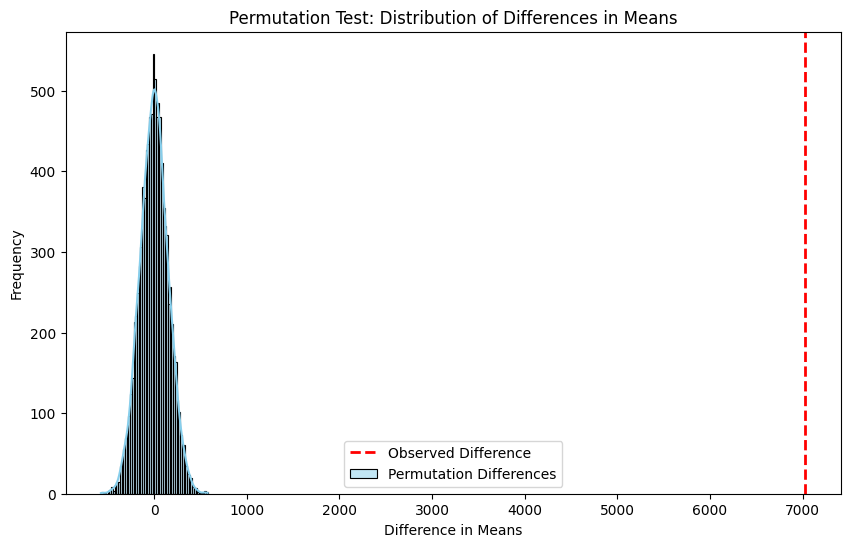

In [41]:
# Observed difference in means
observed_diff = group_a.mean() - group_b.mean()

# Permutation test
np.random.seed(0)
n_permutations = 10000
combined = np.concatenate([group_a, group_b])
diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined)
    new_group_a = combined[:len(group_a)]
    new_group_b = combined[len(group_a):]
    diffs.append(new_group_a.mean() - new_group_b.mean())

# Calculate the p-value
diffs = np.array(diffs)
p_value = np.mean(diffs >= observed_diff)

# Print results
print(f"Observed difference in means: {observed_diff:.2f}")
print(f"P-value: {p_value:.4f}")

# Analysis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average sales price.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average sales price.")

# Plotting the permutation distribution
plt.figure(figsize=(10, 6))
sns.histplot(diffs, kde=True, color='skyblue', label='Permutation Differences')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Permutation Test: Distribution of Differences in Means')
plt.legend()
plt.show()

**Interpretation**:
If the **observed difference is far out** in the tail of the permutation distribution, it suggests that the observed difference is unlikely to have occurred by chance, indicating a significant effect.

## bootstrap permutation test

Observed difference in means: 7031.33
P-value: 0.0000


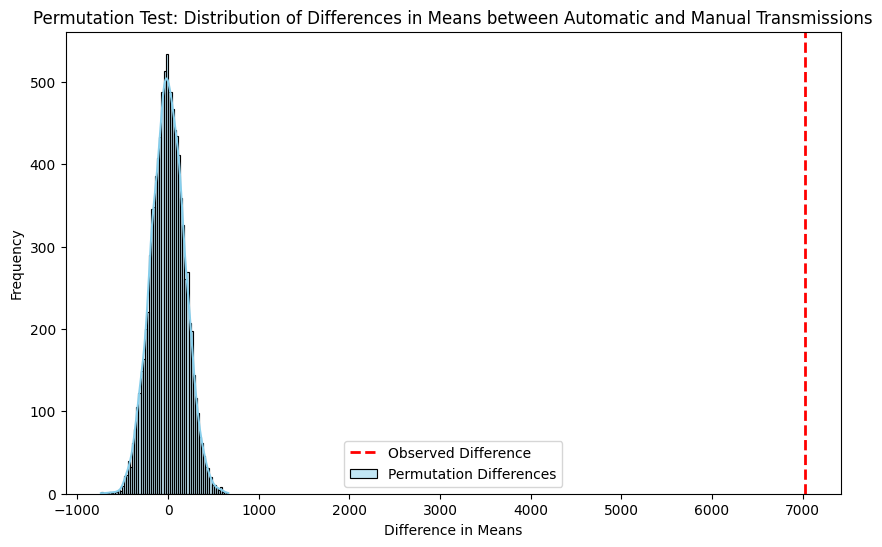

In [42]:


# Calculate the observed means for each group
observed_means = df.groupby('transmission')['price'].mean()
observed_diff = observed_means['Automatic'] - observed_means['Manual']

# Separate data by group
group_a = df[df['transmission'] == 'Automatic']['price']
group_b = df[df['transmission'] == 'Manual']['price']
size_a = len(group_a)
size_b = len(group_b)

# Combine the data from both groups
combined = np.concatenate([group_a, group_b])

# Permutation test
np.random.seed(0)
n_permutations = 10000
perm_diffs = []

for _ in range(n_permutations):
    # Shuffle combined data
    np.random.shuffle(combined)

    # Draw resamples
    perm_group_a = combined[:size_a]
    perm_group_b = np.random.choice(combined[size_a:], size=size_b, replace=True)

    # Calculate the difference in means for this permutation
    perm_diff = np.mean(perm_group_a) - np.mean(perm_group_b)
    perm_diffs.append(perm_diff)

# Calculate the p-value
perm_diffs = np.array(perm_diffs)
p_value = np.mean(perm_diffs >= observed_diff)

# Print results
print(f"Observed difference in means: {observed_diff:.2f}")
print(f"P-value: {p_value:.4f}")

# Plotting the permutation distribution
plt.figure(figsize=(10, 6))
sns.histplot(perm_diffs, kde=True, color='skyblue', label='Permutation Differences')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Permutation Test: Distribution of Differences in Means between Automatic and Manual Transmissions')
plt.legend()
plt.show()


# Statistical Significance
- Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce. If the result is beyond the realm of chance variation, it is said to be **statistically significant**.
- **p-value**: Given a chance model that embodies the **null hypothesis**, the p-value is the probability of obtaining results as unusual or extreme as the observed results. the prob the dif is due to chance. if pvalue is 5%, means there is 5% chance the dif is due to chance. since the prob of chance is very small, we reject chance - null - and see the dif is real.

- **type 1 error**: effect is real - statistically significant - while it is not
- **type 2 error**: effect is not real while it is

Observed difference: 0.0368%
P-value: 0.3210


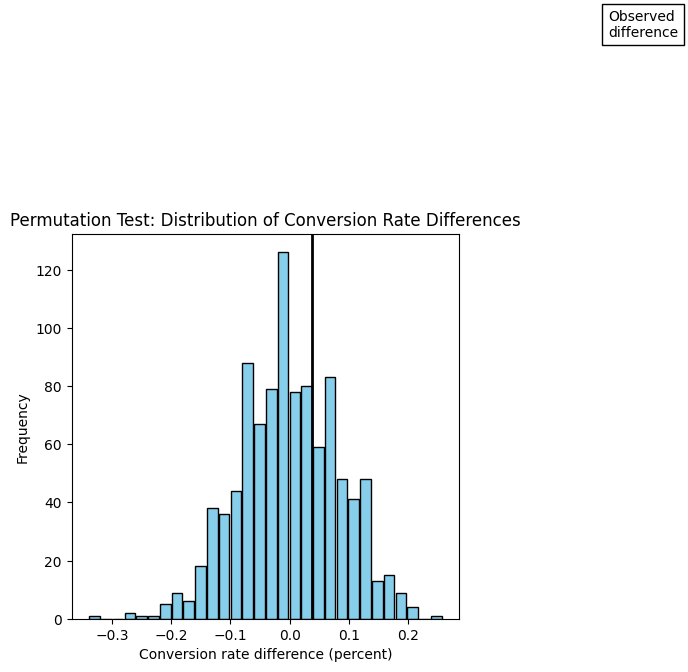

In [52]:
# Given data
price_a = 200 # # conversion of price a
price_b = 182
no_conversion_a = 23539
no_conversion_b = 22406

# Calculate observed percentage difference
obs_pct_diff = 100 * (price_a / (price_a + no_conversion_a) - price_b / (price_b + no_conversion_b))
print(f'Observed difference: {obs_pct_diff:.4f}%')

import random

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = list(random.sample(range(n), nB))
    idx_A = list(set(range(n)) - set(idx_B))
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

# Create conversion data
conversion = [0] * (no_conversion_a + no_conversion_b)
conversion.extend([1] * (price_a + price_b))
conversion = pd.Series(conversion)

# Perform permutation test
np.random.seed(0)
n_permutations = 1000
perm_diffs = [100 * perm_fun(conversion, no_conversion_a+price_a, no_conversion_b+price_b) for _ in range(n_permutations)]

# Calculate p-value
p_value = np.mean(np.array(perm_diffs) >= obs_pct_diff)
print(f'P-value: {p_value:.4f}')

# Plotting the permutation distribution
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=30, rwidth=0.9, color='skyblue', edgecolor='black')
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(obs_pct_diff + 0.5, 200, 'Observed\ndifference', bbox={'facecolor': 'white'})
ax.set_xlabel('Conversion rate difference (percent)')
ax.set_ylabel('Frequency')
ax.set_title('Permutation Test: Distribution of Conversion Rate Differences')
plt.show()

in this case
the observed difference of 0.0368% is well within **the range of chance variation.**


In [56]:
survivors = np.array([[200, 23539], [182, 22406]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
print(f'p-value for single sided test: {p_value / 2:.4f}')


p-value for single sided test: 0.3498


The normal approximation yields a p-value of 0.3498, which is close to the p-value obtained from the permutation test.

- The real problem is that people want more meaning from the p-value than it contains. Here’s what we would like the p-value to convey: **The probability that the result is due to chance**. We hope for a low value, so we can conclude that we’ve proved something. This is how many journal editors were interpreting the p-value. But here’s what the p-value actually represents: **The probability that, given a chance model, results as extreme as the observed results could occur.**
- By itself, a **p-value does not provide a good measure** of evidence regarding a model or hypothesis

## Practical vs. Statistical Significance
**Statistical Significance**:

- **Definition**: It refers to the likelihood that the observed difference or relationship is not due to random chance.
- **Example**: A p-value less than 0.05 typically indicates statistical significance.
- **Context**: With large sample sizes, even very small effects can be statistically significant.

**Practical Significance:**

- **Definition**: It refers to whether the size of the effect is large enough to be of practical concern or to have real-world implications.
- **Example**: An improvement in conversion rate by 0.1% might be **statistically significant but may not be practically significant** if it doesn’t lead to substantial business improvement. And the **opposite**.
- **Context**: Considerations include cost, impact, and relevance to business objectives.

In [57]:
conversion_rate_a = 200 / 23739
conversion_rate_b = 182 / 22588
effect_size = conversion_rate_a - conversion_rate_b

# Business Impact
average_sale_value = 100
additional_conversions = (conversion_rate_a - conversion_rate_b) * 100000  # Example total user base
additional_revenue = additional_conversions * average_sale_value

print(f'Effect Size: {effect_size:.6f}')
print(f'Additional Revenue: ${additional_revenue:.2f}')


Effect Size: 0.000368
Additional Revenue: $3675.79


- The dif is not statistically significant but might be practically significant

# t-Tests

In [61]:
from scipy import stats

# Filter data for automatic transmission cars
automatic_cars = df[df['transmission'] == 'Automatic'].copy()

# Apply a discount to create the test group
discount_rate = 0.10
automatic_cars.loc[:, 'discounted_price'] = automatic_cars['price'] * (1 - discount_rate)

# Separate into two groups
group_a = automatic_cars['price']
group_b = automatic_cars['discounted_price']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Analysis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average sales price.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average sales price.")


T-statistic: 10.04
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average sales price.


# Multiple Testing
**Multiplicity**, also known as **the multiple comparisons problem**, arises when multiple statistical tests are performed simultaneously. This increases the **risk of finding at least one statistically significant result** purely by chance, which can lead to false conclusions.

<br>

Suppose you are conducting a study to find factors affecting plant growth. You measure 20 different variables (e.g., sunlight, water, soil type, temperature) and perform regression analysis to test the significance of each variable.
- **Without Correction**: You may find that 2 out of 20 variables are significant at α=0.05.
- **With Correction**: Applying Bonferroni correction, the new significance level is 0.05/20=0.0025. You may find no variables are significant at the corrected level

In [65]:
import numpy as np

# Simulated p-values from multiple tests
p_values = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])

# Number of tests
n_tests = len(p_values)

# Bonferroni correction
alpha = 0.05
alpha_corrected = alpha / n_tests
significant = p_values < alpha_corrected

print(f'Corrected alpha: {alpha_corrected}')
print(f'Significant p-values after Bonferroni correction: {p_values[significant]}')


Corrected alpha: 0.005
Significant p-values after Bonferroni correction: []


In [63]:
from statsmodels.stats.multitest import multipletests

# Simulated p-values from multiple tests
p_values = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])

# Apply Benjamini-Hochberg procedure
alpha = 0.05
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

print(f'Corrected p-values: {pvals_corrected}')
print(f'Significant p-values after FDR correction: {p_values[reject]}')


Corrected p-values: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Significant p-values after FDR correction: []


# Degrees of Freedom
- Suppose we have a sample of 10 values, and we know the mean of these values. The degrees of freedom for this sample are n−1=10−1=9. This means that 9 of the sample values are free to vary, but the 10th value is constrained by the mean.


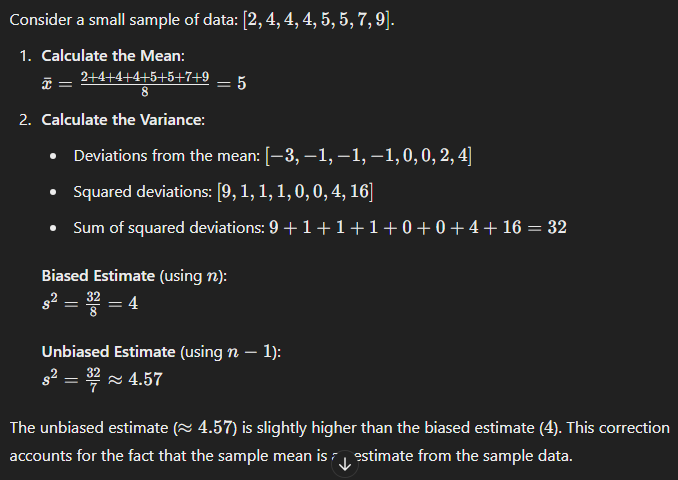

# ANOVA
- Suppose that, instead of an A/B test, we had a comparison of multiple groups, say A/B/C/D, each with numeric data. The statistical procedure that tests for a **statistically significant difference among the groups** is called **analysis of variance, or ANOVA**
- When we were comparing **just two groups**, it was a simple matter; we merely looked at **the difference between the means of each group**.
- With **four means**, there are **six** possible comparisons between groups.
- The more such pairwise comparisons we make, the greater the potential for being **fooled by random chance** (“Multiple Testing”). Instead of worrying about all the different comparisons between individual pages we could possibly make, we can do a **single overall test** that addresses the question, “**Could all the pages have the same underlying stickiness**, and the differences among them be due to the random way in which a common set of session times got allocated among the four pages?”

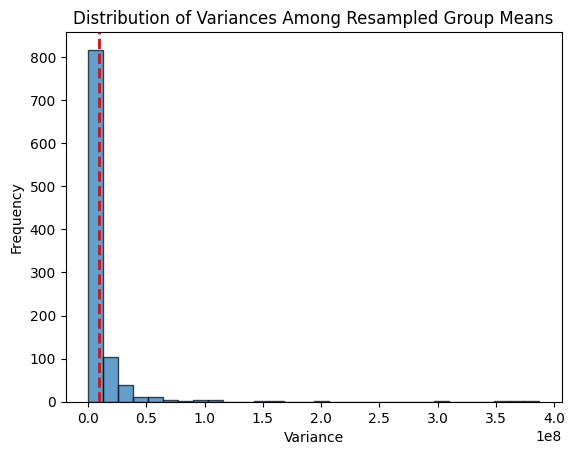

Observed Variance: 9085132.0115
P-value: 0.2710


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# df = pd.read_csv('your_data.csv')  # load your data here

# Combine all prices into a single dataset
all_prices = df['price'].values

# Sample sizes for each group
sizes = {
    'Automatic': 2657,
    'Manual': 3826,
    'Other': 1,
    'Semi-Auto': 254
}

# Initialize list to store variances of group means
variances = []

# Perform resampling
num_iterations = 1000
np.random.seed(0)

for _ in range(num_iterations):
    np.random.shuffle(all_prices)
    start = 0
    group_means = []
    for group, size in sizes.items():
        end = start + size
        resample = all_prices[start:end]
        group_means.append(np.mean(resample))
        start = end
    variance = np.var(group_means, ddof=1)
    variances.append(variance)

# Calculate observed variance among the actual means
actual_group_means = [
    16582.828754,  # Automatic
    9551.496864,   # Manual
    12795.000000,  # Other
    14797.137795   # Semi-Auto
]
observed_variance = np.var(actual_group_means, ddof=1)

# Plot the distribution of variances
plt.hist(variances, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(observed_variance, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Variances Among Resampled Group Means')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

# Calculate p-value
p_value = np.mean(np.array(variances) >= observed_variance)
print(f'Observed Variance: {observed_variance:.4f}')
print(f'P-value: {p_value:.4f}')


In the above exp, we used permutation test, while below the F-statistic

## F-Statistic
- Just like the **t-test** can be used instead of a **permutation test** for **comparing the mean of two groups**, there is a statistical test for ANOVA based on the F-statistic.
- The **F-statistic** is based on the ratio of the variance **across group means** (i.e., the treatment effect) to the variance due to residual error. The higher this ratio, the more statistically significant the result. If the data follows a **normal** distribution, then statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute a p-value.
- The ANOVA test assumes that the **residuals are normally distributed** and homoscedastic. You might want to check these assumptions and possibly perform transformations if they are violated.

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is already loaded with the appropriate data
# df = pd.read_csv('your_data.csv')  # load your data here

# Fit the model
model = smf.ols('price ~ transmission', data=df).fit()

# Perform ANOVA
aov_table = sm.stats.anova_lm(model)

print(aov_table)


                  df        sum_sq       mean_sq           F  PR(>F)
transmission     3.0  7.888985e+10  2.629662e+10  920.684428     0.0
Residual      6734.0  1.923367e+11  2.856203e+07         NaN     NaN


Based on this ANOVA result:

There is **statistically significant difference** in the average prices of cars with different transmission types. The low p-value (0.00) suggests that any observed differences are not likely due to random variation.

In [82]:
len(df)-4

6734

In [84]:
6.052125e+07/3, 2.017375e+07/4.026820e+07

(20173750.0, 0.5009846479355918)

Here, F = 0.500985, indicating the ratio of variance explained by transmission to variance unexplained by it.

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway


# Group prices by transmission type
automatic_prices = df[df['transmission'] == 'Automatic']['price']
manual_prices = df[df['transmission'] == 'Manual']['price']
other_prices = df[df['transmission'] == 'Other']['price']
semi_auto_prices = df[df['transmission'] == 'Semi-Auto']['price']

# Perform ANOVA
f_statistic, p_value = f_oneway(automatic_prices, manual_prices, other_prices, semi_auto_prices)

print(f'F-statistic: {f_statistic:.3f}')
print(f'P-value: {p_value:.3f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in prices based on transmission type.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in prices based on transmission type.')


F-statistic: 920.684
P-value: 0.000
Reject the null hypothesis: There is a significant difference in prices based on transmission type.


- When we compare the means between all dif groups, there is **no dif**. but when compared between two groups, there is **dif**. This is where **mulitple testing** shows up.

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Post-hoc test
tukey = pairwise_tukeyhsd(df['price'], df['transmission'])
print(tukey)


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
Automatic    Manual -7031.3319    0.0  -7378.1424 -6684.5214   True
Automatic     Other -3787.8288 0.8937 -17523.6348  9947.9773  False
Automatic Semi-Auto  -1785.691    0.0  -2687.6377  -883.7442   True
   Manual     Other  3243.5031 0.9299 -10491.5135 16978.5197  False
   Manual Semi-Auto  5245.6409    0.0   4355.7984  6135.4835   True
    Other Semi-Auto  2002.1378 0.9822 -11758.0915 15762.3671  False
-------------------------------------------------------------------


## Two-Way ANOVA
**Factors (Independent Variables)**:

- Factor A: The first categorical independent variable.
- Factor B: The second categorical independent variable.
- Interaction: The combined effect of both factors on the dependent variable.

**Dependent Variable**:

- The continuous variable that you measure, which you suspect is **affected by both independent variables**.

**Objectives of Two-Way ANOVA**
- Main Effect of Factor A: Tests whether the mean of the dependent variable differs across the levels of Factor A.
- Main Effect of Factor B: Tests whether the mean of the dependent variable differs across the levels of Factor B.
- Interaction Effect: Tests whether the effect of one independent variable on the dependent variable depends on the level of the other independent variable.



**Example**
- Choose the factors: We'll use `transmission and fuelType` as the two factors.
- Define the response variable: The response variable is `price`.
- Perform Two-Way ANOVA: We will assess if there are any significant differences in price due to transmission, fuelType, and their interaction.

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Perform Two-Way ANOVA
model = smf.ols('price ~ C(transmission) * C(fuelType)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                   sum_sq      df           F         PR(>F)
C(transmission)              3.308256e+10     3.0  467.788622  2.386555e-100
C(fuelType)                  4.651432e+10     3.0  657.714286  1.776173e-138
C(transmission):C(fuelType)  3.035425e+10     9.0  143.070102  1.054893e-144
Residual                     1.585804e+11  6727.0         NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '


**Main Effects:**
- C(transmission): Indicates if the type of transmission has a significant impact on the price.
- C(fuelType): Indicates if the type of fuel has a significant impact on the price.

**Interaction Effect:**
- C(transmission):C(fuelType): Tests if there is an interaction between transmission and fuel type that significantly affects the price.

**Residual**:
- The variation not explained by the model.

A significant p-value (e.g., < 0.05) for any term suggests that the factor or interaction between factors significantly affects the response variable.

#  Chi-square test

## Feature selection

In [32]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, Binarizer

# Suppose 'price' is the target, and we want to classify cars as 'expensive' or 'cheap'
threshold = df['price'].median()
df['target'] = (df['price'] > threshold).astype(int)

# Label encode categorical variables
le_transmission = LabelEncoder()
le_fuelType = LabelEncoder()

df['transmission_encoded'] = le_transmission.fit_transform(df['transmission'])
df['fuelType_encoded'] = le_fuelType.fit_transform(df['fuelType'])

# Select features using Chi-square test
X = df[['transmission_encoded', 'fuelType_encoded']]
y = df['target']

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Get Chi-square scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Display results
features = ['transmission', 'fuelType']
for feature, score, p_value in zip(features, chi2_scores, p_values):
    print(f'Feature: {feature}, Chi2 Score: {score:.4f}, P-value: {p_value:.4f}')


Feature: transmission, Chi2 Score: 841.9351, P-value: 0.0000
Feature: fuelType, Chi2 Score: 961.7522, P-value: 0.0000


# Multi-Arm Bandit Algorithm
Imagine you’re running a marketing campaign with four different ad creatives (A/B/C/D). A traditional approach would involve testing each pair or conducting an ANOVA, which could be time-consuming and require a large sample size. A bandit algorithm, on the other hand, would start by allocating traffic evenly among the four ads. As it gathers data, it would gradually direct more traffic to the ads that are performing better, eventually concentrating on the one that is the most effective, while still occasionally testing the others to ensure they haven't improved.